In [1]:
from sklearn.preprocessing import MinMaxScaler

class UtilityAnalyzer:

    def utility_function(self, data, threshold = 0.04, penality = 1, roof = 3, min_val = 2):
        #print(data[:10])
        _result = []
        for val in data:
            if val >= threshold:
                _result.append((threshold - val))
            else:
                _result.append((threshold - val))
        #print(_result[:10])
        #print("OLD DATA", _result[-5:])
        #print("MIN VALUE", min(_result))
        #return _result
        _result_ = [float(i) + min_val for i in _result]

        normalized = [float(i)/roof for i in _result_]
        #print("NORMALIZED DATA", normalized[-5:])
        #return normalized
        return normalized

    def cumulate_data(self, data):
        _result, act_sum = [], 0
        for idx, val in enumerate(data):
            if idx == 0:
                _result.append(data[0])
                act_sum = data[0]
            else:
                #print(act_sum)
                _result.append(act_sum + val)
                act_sum += val
        #return _result
        #print("OLD DATA", _result[-5:])
        #scaler = MinMaxScaler()
        #scaler.fit(_result)
        #normalized = scaler.transform(_result)
        #normalized = [float(i)/_result[-1] for i in _result]
        #print("NORMALIZED DATA", normalized[-5:])
        #return normalized
        return _result

    def reverse(self, data):
        _reversed = [1 - item for item in data]
        return _reversed

In [2]:
import pandas as pd
import numpy as np
from UtilityAnalyzer import UtilityAnalyzer
import os
import csv
from statistics import mean

class DataLoader:

    def __init__(self, parent_folder):
        self.parent_folder = parent_folder
        self.BB_Folder = "BB"
        self.ED_Folder = "ED"
        self.LI_Folder = "LY"
        self.consumption_files = [
            [self.parent_folder + "/LY/processed_data.csv"], 
            [self.parent_folder + "/BB/processed_data.csv"], 
            [self.parent_folder + "/ED/processed_data.csv"], 
            [self.parent_folder + "/STD/processed_data.csv"]
        ]
        self.data = {}

    def read_consumption_files(self, files, timeword = "Time", with_input = False, separator = ';', interval = 10):
        count = 0
        row_list = ""

        sm_ly = []

        for file in files:
            print("ANALYZING FILE", file)
            with open(file) as csv_file:
                csv_reader = csv.reader(csv_file, delimiter=',')
                c = 0
                for row in csv.reader(iter(csv_file.readline,'')):
                    if count > 1:
                        if len(row)>0:
                            text = ','.join(row)
                            if not timeword in text:
                                
                                #print(count)
                                #print(text)
                                #input()
                                row_list = row_list + text
                                line_data = row_list
                                data_array = line_data.split(',')
                                #print(data_array)
                                #input()
                                #if(len(data_array)>23):
                                #print(data_array)
                                #print(count)
                                ts = data_array[0]
                                vals = [float(i) for i in data_array[1:-1] if '-' not in i]
                                #print (len(line_data.split(";")))
                                row_list=""
                                #print(line_data.split(";"))
                                sm_ly.append(sum(vals))
                                #print("len", len(sm_ly))
                                #sm_ly.append(mean(vals))
                    count+=1

        #print(sm_ly)
        dat = np.add.reduceat(sm_ly, np.arange(0, len(sm_ly), interval))
        print("Numrows", len(dat))
        return dat

    def load(self):

        print("Loading...")
        self.data["MONITOR_LAYERED_RESPTIME"] = pd.read_csv(self.parent_folder + '/' + self.LI_Folder + '/MonitorRT_.txt', delimiter=";", header=None).values[0][:-1]
        self.data["MONITOR_LAYERED_CPUTIME"] = pd.read_csv(self.parent_folder + '/' + self.LI_Folder + '/MonitorCPU_.txt', delimiter=";", header=None).values[0][:-1]
        self.data["MONITOR_BB_RESPTIME"] = pd.read_csv(self.parent_folder + '/' + self.BB_Folder + '/MonitorRT_.txt', delimiter=";", header=None).values[0][:-1]
        self.data["MONITOR_BB_CPUTIME"] = pd.read_csv(self.parent_folder + '/' + self.BB_Folder + '/MonitorCPU_.txt', delimiter=";", header=None).values[0][:-1]
        self.data["MONITOR_ED_RESPTIME"] = pd.read_csv(self.parent_folder + '/' + self.ED_Folder + '/MonitorRT_.txt', delimiter=";", header=None).values[0][:-1]
        self.data["MONITOR_ED_CPUTIME"] = pd.read_csv(self.parent_folder + '/' + self.ED_Folder + '/MonitorCPU_.txt', delimiter=";", header=None).values[0][:-1]
        print("Monitor data loaded!")
        self.data["ANALYZER_LAYERED_RESPTIME"] = pd.read_csv(self.parent_folder + '/' + self.LI_Folder + '/AnalyzerRT_.txt', delimiter=";", header=None).values[0][:-1]
        self.data["ANALYZER_LAYERED_CPUTIME"] = pd.read_csv(self.parent_folder + '/' + self.LI_Folder + '/AnalyzerCPU_.txt', delimiter=";", header=None).values[0][:-1]
        self.data["ANALYZER_BB_RESPTIME"] = pd.read_csv(self.parent_folder + '/' + self.BB_Folder + '/AnalyzerRT_.txt', delimiter=";", header=None).values[0][:-1]
        self.data["ANALYZER_BB_CPUTIME"] = pd.read_csv(self.parent_folder + '/' + self.BB_Folder + '/AnalyzerCPU_.txt', delimiter=";", header=None).values[0][:-1]
        self.data["ANALYZER_ED_RESPTIME"] = pd.read_csv(self.parent_folder + '/' + self.ED_Folder + '/AnalyzerRT_.txt', delimiter=";", header=None).values[0][:-1]
        self.data["ANALYZER_ED_CPUTIME"] = pd.read_csv(self.parent_folder + '/' + self.ED_Folder + '/AnalyzerCPU_.txt', delimiter=";", header=None).values[0][:-1]
        print("Analyzer data loaded!")
        self.data["PLANNER_LAYERED_RESPTIME"] = pd.read_csv(self.parent_folder + '/' + self.LI_Folder + '/PlannerRT_.txt', delimiter=";", header=None).values[0][:-1]
        self.data["PLANNER_LAYERED_CPUTIME"] = pd.read_csv(self.parent_folder + '/' + self.LI_Folder + '/PlannerCPU_.txt', delimiter=";", header=None).values[0][:-1]
        self.data["PLANNER_BB_RESPTIME"] = pd.read_csv(self.parent_folder + '/' + self.BB_Folder + '/PlannerRT_.txt', delimiter=";", header=None).values[0][:-1]
        self.data["PLANNER_BB_CPUTIME"] = pd.read_csv(self.parent_folder + '/' + self.BB_Folder + '/PlannerCPU_.txt', delimiter=";", header=None).values[0][:-1]
        self.data["PLANNER_ED_RESPTIME"] = pd.read_csv(self.parent_folder + '/' + self.ED_Folder + '/PlannerRT_.txt', delimiter=";", header=None).values[0][:-1]
        self.data["PLANNER_ED_CPUTIME"] = pd.read_csv(self.parent_folder + '/' + self.ED_Folder + '/PlannerCPU_.txt', delimiter=";", header=None).values[0][:-1]
        print("Planner data loaded!")
        self.data["EXECUTOR_LAYERED_RESPTIME"] = pd.read_csv(self.parent_folder + '/' + self.LI_Folder + '/ExecutorRT_.txt', delimiter=";", header=None).values[0][:-1]
        self.data["EXECUTOR_BB_RESPTIME"] = pd.read_csv(self.parent_folder + '/' + self.BB_Folder + '/ExecutorRT_.txt', delimiter=";", header=None).values[0][:-1]
        self.data["EXECUTOR_ED_RESPTIME"] = pd.read_csv(self.parent_folder + '/' + self.ED_Folder + '/ExecutorRT_.txt', delimiter=";", header=None).values[0][:-1]
        self.data["EXECUTOR_LAYERED_CPUTIME"] = pd.read_csv(self.parent_folder + '/' + self.LI_Folder + '/ExecutorRT_.txt', delimiter=";", header=None).values[0][:-1]
        self.data["EXECUTOR_BB_CPUTIME"] = pd.read_csv(self.parent_folder + '/' + self.BB_Folder + '/ExecutorRT_.txt', delimiter=";", header=None).values[0][:-1]
        self.data["EXECUTOR_ED_CPUTIME"] = pd.read_csv(self.parent_folder + '/' + self.ED_Folder + '/ExecutorRT_.txt', delimiter=";", header=None).values[0][:-1]
        print("Executor data loaded!")
        if self.parent_folder == "2h":
            interval = 600
        else:
            interval = 10

        print("Interval", interval)
        self.data["CONSUMPTION_LY"] = self.read_consumption_files(self.consumption_files[0], interval = interval)
        self.data["CONSUMPTION_BB"] = self.read_consumption_files(self.consumption_files[1], interval = interval)
        self.data["CONSUMPTION_ED"] = self.read_consumption_files(self.consumption_files[2], interval = interval)
        self.data["CONSUMPTION_STD"] = self.read_consumption_files(self.consumption_files[3], interval = interval)
        print("Consumption data loaded! Success")

    def apply_utility(self, RT_Thresh, E_Thresh, verbose = 1):
        utility = UtilityAnalyzer()

        normalize_roof = max([max(v) for k, v in self.data.items()])


        ln = min(len(self.data["MONITOR_LAYERED_RESPTIME"]), len(self.data["MONITOR_BB_RESPTIME"]), len(self.data["MONITOR_ED_RESPTIME"]))
        __monitor_resp_time = [
            utility.cumulate_data(utility.reverse(utility.utility_function(self.data["MONITOR_LAYERED_RESPTIME"][:ln], threshold = RT_Thresh))),
            utility.cumulate_data(utility.reverse(utility.utility_function(self.data["MONITOR_BB_RESPTIME"][:ln], threshold = RT_Thresh))),
            utility.cumulate_data(utility.reverse(utility.utility_function(self.data["MONITOR_ED_RESPTIME"][:ln], threshold = RT_Thresh)))
        ]

        ln = min(len(self.data["ANALYZER_LAYERED_RESPTIME"]), len(self.data["ANALYZER_BB_RESPTIME"]), len(self.data["ANALYZER_ED_RESPTIME"]))
        __analyzer_resp_time = [
            utility.cumulate_data(utility.reverse(utility.utility_function(self.data["ANALYZER_LAYERED_RESPTIME"][:ln], threshold = RT_Thresh))),
            utility.cumulate_data(utility.reverse(utility.utility_function(self.data["ANALYZER_BB_RESPTIME"][:ln], threshold = RT_Thresh))),
            utility.cumulate_data(utility.reverse(utility.utility_function(self.data["ANALYZER_ED_RESPTIME"][:ln], threshold = RT_Thresh)))
        ]

        ln = min(len(self.data["PLANNER_LAYERED_RESPTIME"]), len(self.data["PLANNER_BB_RESPTIME"]), len(self.data["PLANNER_ED_RESPTIME"]))
        __planner_resp_time = [
            utility.cumulate_data(utility.reverse(utility.utility_function(self.data["PLANNER_LAYERED_RESPTIME"][:ln], threshold = RT_Thresh))),
            utility.cumulate_data(utility.reverse(utility.utility_function(self.data["PLANNER_BB_RESPTIME"][:ln], threshold = RT_Thresh))),
            utility.cumulate_data(utility.reverse(utility.utility_function(self.data["PLANNER_ED_RESPTIME"][:ln], threshold = RT_Thresh)))
        ]

        ln = min(len(self.data["EXECUTOR_LAYERED_RESPTIME"]), len(self.data["EXECUTOR_BB_RESPTIME"]), len(self.data["EXECUTOR_ED_RESPTIME"]))
        __executor_resp_time = [
            utility.cumulate_data(utility.reverse(utility.utility_function(self.data["EXECUTOR_LAYERED_RESPTIME"][:ln], threshold = RT_Thresh))),
            utility.cumulate_data(utility.reverse(utility.utility_function(self.data["EXECUTOR_BB_RESPTIME"][:ln], threshold = RT_Thresh))),
            utility.cumulate_data(utility.reverse(utility.utility_function(self.data["EXECUTOR_ED_RESPTIME"][:ln], threshold = RT_Thresh)))
        ]

        ln = min(len(self.data["CONSUMPTION_LY"]), len(self.data["CONSUMPTION_BB"]), len(self.data["CONSUMPTION_ED"]), len(self.data["CONSUMPTION_STD"]))

        __consumption = [
            utility.cumulate_data(utility.utility_function(self.data["CONSUMPTION_LY"][:ln], threshold = E_Thresh)),
            utility.cumulate_data(utility.utility_function(self.data["CONSUMPTION_BB"][:ln], threshold = E_Thresh)),
            utility.cumulate_data(utility.utility_function(self.data["CONSUMPTION_ED"][:ln], threshold = E_Thresh)),
            utility.cumulate_data(utility.utility_function(self.data["CONSUMPTION_STD"][:ln], threshold = E_Thresh))
        ]

        if verbose:
            # Layered
            print("\n\nLAYERED")
            print("Energy consumption: ", __consumption[0][-1])
            print(__monitor_resp_time[0][-1], __analyzer_resp_time[0][-1],  __planner_resp_time[0][-1], __executor_resp_time[0][-1])
            total_rt = __monitor_resp_time[0][-1] + __analyzer_resp_time[0][-1] + __planner_resp_time[0][-1] + __executor_resp_time[0][-1]
            print("Total response time: ", total_rt)
            print("Benefit/Cost = ", (__consumption[0][-1] / total_rt))

            # Blackboard
            print("\n\nBB")
            print("Energy consumption: ", __consumption[1][-1])
            print(__monitor_resp_time[1][-1], __analyzer_resp_time[1][-1],  __planner_resp_time[1][-1], __executor_resp_time[1][-1])
            total_rt = __monitor_resp_time[1][-1] + __analyzer_resp_time[1][-1] + __planner_resp_time[1][-1] + __executor_resp_time[1][-1]
            print("Total response time: ", total_rt)
            print("Benefit/Cost = ", (__consumption[1][-1] / total_rt))

            # EventDriven
            print("\n\nED")
            print("Energy consumption: ", __consumption[2][-1])
            print(__monitor_resp_time[2][-1], __analyzer_resp_time[2][-1],  __planner_resp_time[2][-1], __executor_resp_time[2][-1])
            total_rt = __monitor_resp_time[2][-1] + __analyzer_resp_time[2][-1] + __planner_resp_time[2][-1] + __executor_resp_time[2][-1]
            print("Total response time: ", total_rt)
            print("Benefit/Cost = ", (__consumption[2][-1] / total_rt))

        return __monitor_resp_time, __analyzer_resp_time, __planner_resp_time, __executor_resp_time, __consumption


In [3]:
import matplotlib.pyplot as plt
import numpy as np

loader2h = DataLoader("2h")
loader2h.load()

loader24h = DataLoader("24h")
loader24h.load()

Loading...
Monitor data loaded!
Analyzer data loaded!
Planner data loaded!
Executor data loaded!
Interval 600
ANALYZING FILE 2h/LY/processed_data.csv
Numrows 12
ANALYZING FILE 2h/BB/processed_data.csv
Numrows 12
ANALYZING FILE 2h/ED/processed_data.csv
Numrows 12
ANALYZING FILE 2h/STD/processed_data.csv
Numrows 12
Consumption data loaded! Success
Loading...
Monitor data loaded!
Analyzer data loaded!
Planner data loaded!
Executor data loaded!
Interval 10
ANALYZING FILE 24h/LY/processed_data.csv
Numrows 144
ANALYZING FILE 24h/BB/processed_data.csv
Numrows 144
ANALYZING FILE 24h/ED/processed_data.csv
Numrows 144
ANALYZING FILE 24h/STD/processed_data.csv
Numrows 144
Consumption data loaded! Success


## Testing 
* RT Threshold = 0.04
* EC Threshold = 0.02

In [ ]:
print("---------------------- 24 h ---------------------------------")

loader24h.apply_utility(RT_Thresh = 0.03, E_Thresh = 0.02, verbose = 1)

print("---------------------- 2 h ---------------------------------")

loader2h.apply_utility(RT_Thresh = 0.03, E_Thresh = 0.02, verbose = 1)

print("---------------------- END ---------------------------------")


In [ ]:
print("---------------------- 24 h ---------------------------------")

loader24h.apply_utility(RT_Thresh = 0.06, E_Thresh = 0.03, verbose = 1)

print("---------------------- 2 h ---------------------------------")

loader2h.apply_utility(RT_Thresh = 0.06, E_Thresh = 0.03, verbose = 1)

print("---------------------- END ---------------------------------")

In [ ]:
def util(data, threshold = 0.01, penality = 1):
        #print(data[:10])
        _result = []
        for val in data:
            if val >= threshold:
                _result.append((threshold - val))
            else:
                _result.append((threshold - val))
                
        plt.plot(_result)
        plt.show()
        #print(_result[:10])
        print("OLD DATA", _result[-5:])
        print("MIN VALUE", min(_result))
        _result_ = [float(i) + abs(min(_result)) for i in _result]
        plt.plot(_result_)
        plt.show()

        normalized = [float(i)/max(_result_) for i in _result_]
        print("NORMALIZED DATA", normalized[-5:])
        plt.plot(normalized)
        plt.ylabel('Normalized')
        plt.show()
        #return normalized
        return normalized
    
def cumul(data):
        _result, act_sum = [], 0
        for idx, val in enumerate(data):
            if idx == 0:
                _result.append(data[0])
                act_sum = data[0]
            else:
                #print(act_sum)
                _result.append(act_sum + val)
                act_sum += val
        plt.plot(_result)
        plt.ylabel('Cumulated')
        plt.show()
        return _result

data = loader.data["MONITOR_LAYERED_RESPTIME"]

plt.plot(data)
plt.show()



cumul(util(data))

print("")

In [ ]:
utility = UtilityAnalyzer()

plt.rcParams["figure.figsize"] = (15,7)
dat1 = loader24h.data["MONITOR_LAYERED_RESPTIME"]
dat2 = loader24h.data["MONITOR_BB_RESPTIME"]
dat3 = loader24h.data["MONITOR_ED_RESPTIME"]


plt.plot(loader24h.data["MONITOR_BB_RESPTIME"], label = "BB")
plt.plot(loader24h.data["MONITOR_ED_RESPTIME"], label = "ED")
plt.plot(loader24h.data["MONITOR_LAYERED_RESPTIME"], label = "Layered")
plt.legend()
plt.show()


plt.plot(loader24h.data["ANALYZER_BB_RESPTIME"], label = "BB")
plt.plot(loader24h.data["ANALYZER_ED_RESPTIME"], label = "ED")
plt.plot(loader24h.data["ANALYZER_LAYERED_RESPTIME"], label = "Layered")
plt.legend()
plt.show()


plt.plot(loader24h.data["PLANNER_BB_RESPTIME"], label = "BB")
plt.plot(loader24h.data["PLANNER_ED_RESPTIME"], label = "ED")
plt.plot(loader24h.data["PLANNER_LAYERED_RESPTIME"], label = "Layered")
plt.legend()
plt.show()

plt.plot(loader24h.data["EXECUTOR_BB_RESPTIME"], label = "BB")
plt.plot(loader24h.data["EXECUTOR_ED_RESPTIME"], label = "ED")
plt.plot(loader24h.data["EXECUTOR_LAYERED_RESPTIME"], label = "Layered")
plt.legend()
plt.show()



In [ ]:
def utility_function(data, threshold = 0.04, penality = 1, roof = 3, min_val = 2):
    #print(data[:10])
    _result = []
    for val in data:
        if val >= threshold:
            _result.append((threshold - val))
        else:
            _result.append((threshold - val))
    #print(_result[:10])
    #print("OLD DATA", _result[-5:])
    #print("MIN VALUE", min(_result))
    #return _result
    _result_ = [float(i) + min_val for i in _result]

    normalized = [float(i)/roof for i in _result_]
    #print("NORMALIZED DATA", normalized[-5:])
    #return normalized
    return normalized

In [ ]:
plt.rcParams["figure.figsize"] = (15,7)

dat1 = loader24h.data["MONITOR_BB_RESPTIME"]
dat2 = loader24h.data["MONITOR_ED_RESPTIME"]
dat3 = loader24h.data["MONITOR_LAYERED_RESPTIME"]

plt.plot(dat1, label = "BB")
plt.plot(dat2, label = "ED")
plt.plot(dat3, label = "Layered")
plt.legend()
plt.show()

ut = UtilityAnalyzer()

dat1_u = ut.utility_function(dat1, threshold = 0.4)
dat2_u = ut.utility_function(dat2, threshold = 0.4)
dat3_u = ut.utility_function(dat3, threshold = 0.4)

plt.plot(dat1_u, label = "BB")
plt.plot(dat2_u, label = "ED")
plt.plot(dat3_u, label = "Layered")
plt.legend()
plt.show()

dat1_u = ut.utility_function(dat1, threshold = 0.04)
dat2_u = ut.utility_function(dat2, threshold = 0.04)
dat3_u = ut.ut.utility_function(dat3, threshold = 0.04)

plt.plot(dat1_u, label = "BB")
plt.plot(dat2_u, label = "ED")
plt.plot(dat3_u, label = "Layered")
plt.legend()
plt.show()

dat1_u = ut.utility_function(dat1, threshold = 0.004)
dat2_u = ut.utility_function(dat2, threshold = 0.004)
dat3_u = ut.utility_function(dat3, threshold = 0.004)

plt.plot(dat1_u, label = "BB")
plt.plot(dat2_u, label = "ED")
plt.plot(dat3_u, label = "Layered")
plt.legend()
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(loader24h.data["CONSUMPTION_LY"], label = "BB")

In [ ]:
import numpy as np
plt.rcParams["figure.figsize"] = (15,7)


def aggregate(data, num = 10):
    i = 0
    aggregated = []
    sum = 0
    for val in data:
        if i > 10:
            i = 0
            sum = 0
        
    return data

dat = loader24h.read_consumption_files(loader24h.parent_folder + "/LY/processed_data.csv")


#dat = loader24h.data["CONSUMPTION_LY"]
print(len(dat))
ag = np.add.reduceat(dat, np.arange(0, len(dat), 10))
#print(dat)
#print(ag)
plt.plot(ag)
plt.show()

144


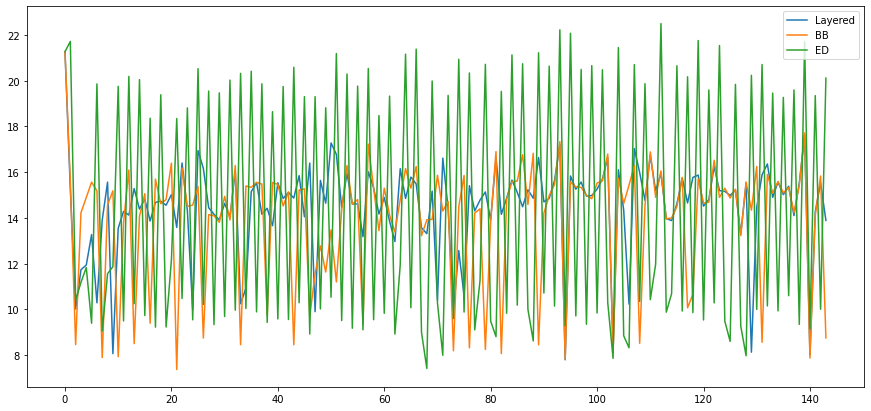

In [12]:
plt.rcParams["figure.figsize"] = (15,7)
dat1 = loader24h.data["CONSUMPTION_LY"]
dat2 = loader24h.data["CONSUMPTION_BB"]
dat3 = loader24h.data["CONSUMPTION_ED"]

print(len(dat))

#print(dat)
#print(ag)
plt.plot(dat1, label="Layered")
plt.plot(dat2, label="BB")
plt.plot(dat3, label="ED")
plt.legend()
plt.show()

144


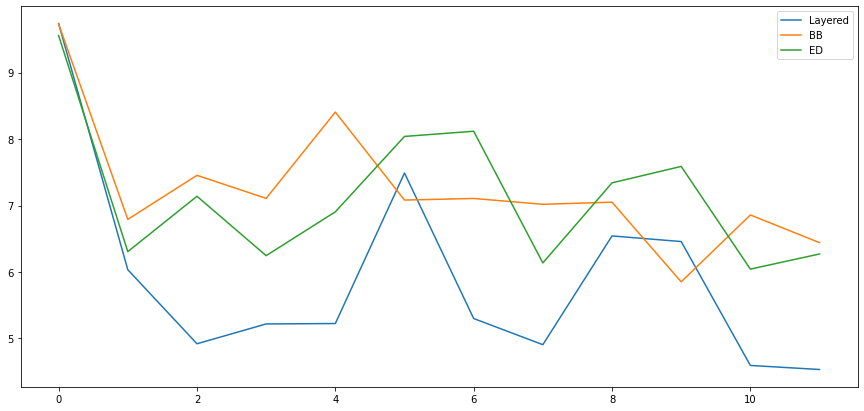

In [13]:
plt.rcParams["figure.figsize"] = (15,7)
dat1 = loader2h.data["CONSUMPTION_LY"]
dat2 = loader2h.data["CONSUMPTION_BB"]
dat3 = loader2h.data["CONSUMPTION_ED"]

print(len(dat))

#print(dat)
#print(ag)
plt.plot(dat1, label="Layered")
plt.plot(dat2, label="BB")
plt.plot(dat3, label="ED")
plt.legend()
plt.show()

In [4]:
import itertools

def mean_aggregation(data, n = 10):
    #return list(np.mean(data.reshape(-1, num), axis=1))
    xp = np.r_[data, np.nan + np.zeros((-len(data) % n,))]
    return list(np.nanmean(xp.reshape(-1, n), axis=-1))
    #return list(itertools.chain.from_iterable([i]*n for i in [sum(data[i:i+n])//n for i in range(0,len(data),n)]))

144


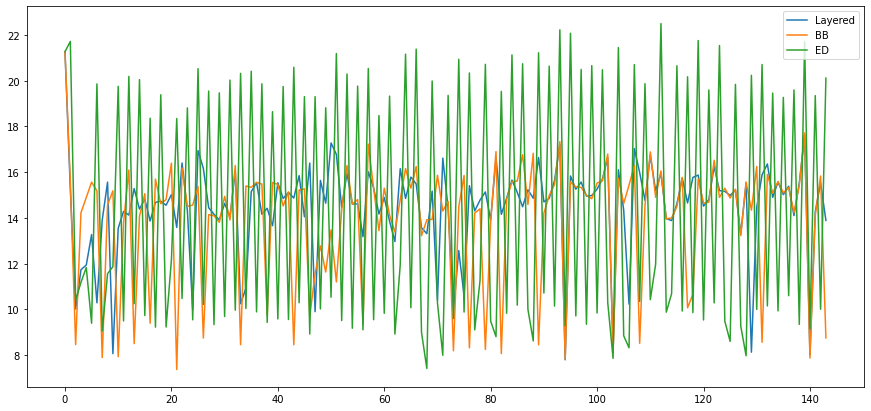

2361 148
2374 149
2316 145


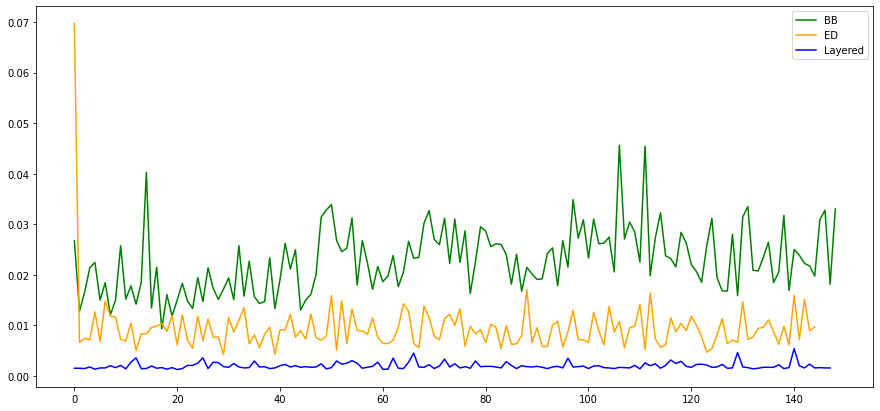

1439 144
1439 144
1433 144


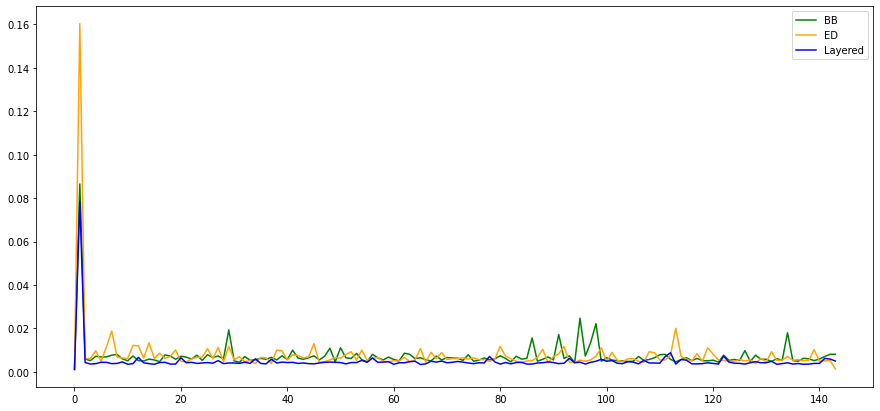

143 143
143 143
142 142


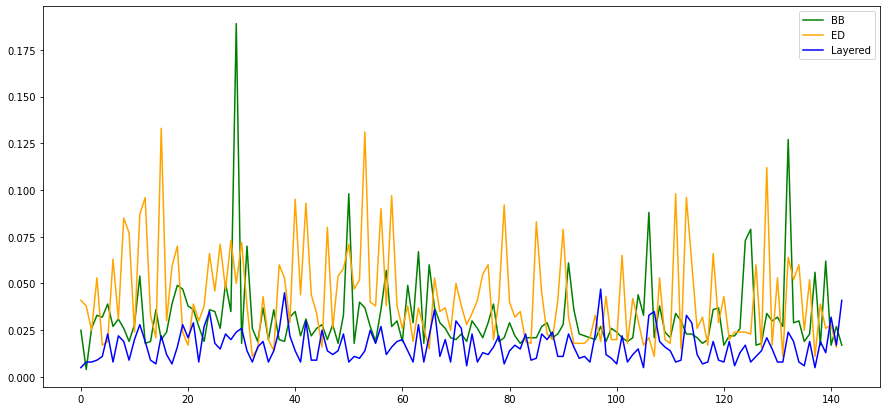

142 142
142 142
141 141


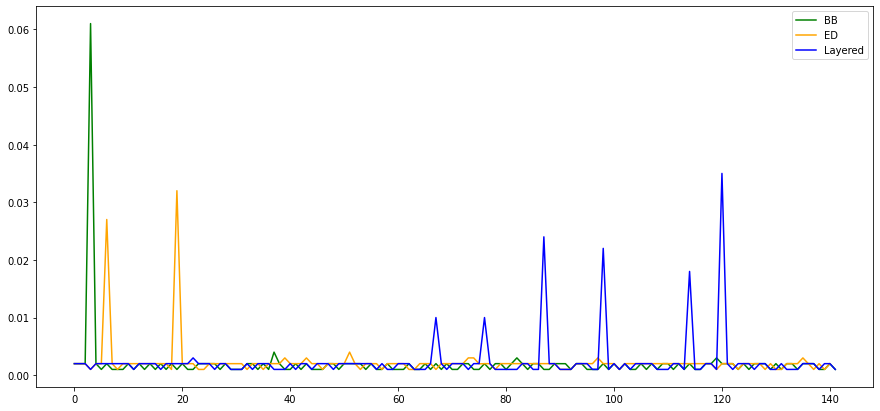

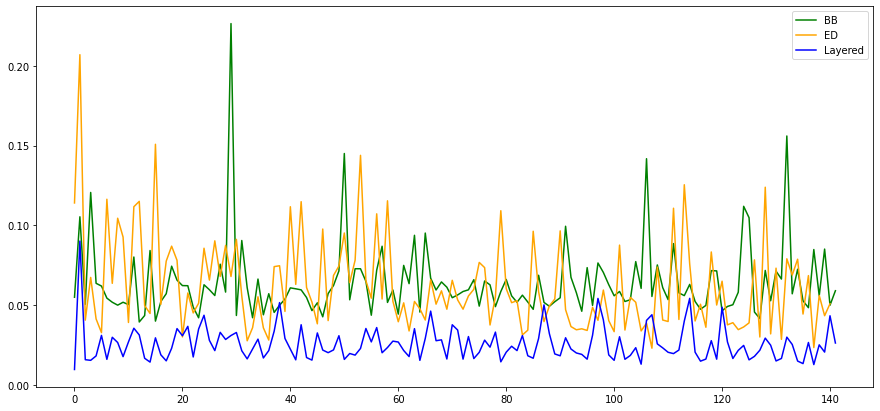

In [21]:
plt.rcParams["figure.figsize"] = (15,7)

dat1 = loader24h.data["CONSUMPTION_LY"]
dat2 = loader24h.data["CONSUMPTION_BB"]
dat3 = loader24h.data["CONSUMPTION_ED"]

print(len(dat1))

#print(dat)
#print(ag)
plt.plot(dat1, label="Layered")
plt.plot(dat2, label="BB")
plt.plot(dat3, label="ED")
plt.legend()
plt.show()

# ================== MONITOR =======================

dat1_monitor = mean_aggregation(loader24h.data["MONITOR_LAYERED_RESPTIME"], n = 16)
dat2_monitor = mean_aggregation(loader24h.data["MONITOR_BB_RESPTIME"], n = 16)
dat3_monitor = mean_aggregation(loader24h.data["MONITOR_ED_RESPTIME"], n = 16)

print(len(loader24h.data["MONITOR_LAYERED_RESPTIME"]), len(dat1_monitor))
print(len(loader24h.data["MONITOR_BB_RESPTIME"]), len(dat2_monitor))
print(len(loader24h.data["MONITOR_ED_RESPTIME"]), len(dat3_monitor))

plt.plot(dat2_monitor, label="BB", color = "green")
plt.plot(dat3_monitor, label="ED", color = "orange")
plt.plot(dat1_monitor, label="Layered", color = "blue")
plt.legend()
plt.show()


# ================== ANALYZER =======================

dat1_analyzer = mean_aggregation(loader24h.data["ANALYZER_LAYERED_RESPTIME"], n = 10)
dat2_analyzer = mean_aggregation(loader24h.data["ANALYZER_BB_RESPTIME"], n = 10)
dat3_analyzer = mean_aggregation(loader24h.data["ANALYZER_ED_RESPTIME"], n = 10)

print(len(loader24h.data["ANALYZER_LAYERED_RESPTIME"]), len(dat1_analyzer))
print(len(loader24h.data["ANALYZER_BB_RESPTIME"]), len(dat2_analyzer))
print(len(loader24h.data["ANALYZER_ED_RESPTIME"]), len(dat3_analyzer))

plt.plot(dat2_analyzer, label="BB", color = "green")
plt.plot(dat3_analyzer, label="ED", color = "orange")
plt.plot(dat1_analyzer, label="Layered", color = "blue")
plt.legend()
plt.show()


# ================== PLANNER =======================

dat1_planner = mean_aggregation(loader24h.data["PLANNER_LAYERED_RESPTIME"], n = 1)
dat2_planner = mean_aggregation(loader24h.data["PLANNER_BB_RESPTIME"], n = 1)
dat3_planner = mean_aggregation(loader24h.data["PLANNER_ED_RESPTIME"], n = 1)

print(len(loader24h.data["PLANNER_LAYERED_RESPTIME"]), len(dat1_planner))
print(len(loader24h.data["PLANNER_BB_RESPTIME"]), len(dat2_planner))
print(len(loader24h.data["PLANNER_ED_RESPTIME"]), len(dat3_planner))

plt.plot(dat2_planner, label="BB", color = "green")
plt.plot(dat3_planner, label="ED", color = "orange")
plt.plot(dat1_planner, label="Layered", color = "blue")
plt.legend()
plt.show()


# ================== EXECUTOR =======================

dat1_executor = mean_aggregation(loader24h.data["EXECUTOR_LAYERED_RESPTIME"], n = 1)
dat2_executor = mean_aggregation(loader24h.data["EXECUTOR_BB_RESPTIME"], n = 1)
dat3_executor = mean_aggregation(loader24h.data["EXECUTOR_ED_RESPTIME"], n = 1)

print(len(loader24h.data["EXECUTOR_LAYERED_RESPTIME"]), len(dat1_executor))
print(len(loader24h.data["EXECUTOR_BB_RESPTIME"]), len(dat2_executor))
print(len(loader24h.data["EXECUTOR_ED_RESPTIME"]), len(dat3_executor))

plt.plot(dat2_executor, label="BB", color = "green")
plt.plot(dat3_executor, label="ED", color = "orange")
plt.plot(dat1_executor, label="Layered", color = "blue")
plt.legend()
plt.show()

def align(mon, an, pl, ex):
    ln = min(len(mon), len(an), len(pl), len(ex))
    return mon[:ln], an[:ln], pl[:ln], ex[:ln]

def sum_up(mon, an, pl, ex):
    mon, an, pl, ex = align(mon, an, pl, ex)
    res = np.add(np.add(np.add(mon, an), pl), ex)
    return res



dat1 = sum_up(dat1_monitor, dat1_analyzer, dat1_planner, dat1_executor)
dat2 = sum_up(dat2_monitor, dat2_analyzer, dat2_planner, dat2_executor)
dat3 = sum_up(dat3_monitor, dat3_analyzer, dat3_planner, dat3_executor)

# ================== TOTAL RESPONSE TIME =======================

# dat1 = dat1_monitor + dat1_analyzer + dat1_planner + dat1_executor
# dat2 = dat2_monitor + dat2_analyzer + dat2_planner + dat2_executor
# dat3 = dat3_monitor + dat3_analyzer + dat3_planner + dat3_executor

# print(len(loader24h.data["EXECUTOR_LAYERED_RESPTIME"]), len(dat1))
# print(len(loader24h.data["EXECUTOR_BB_RESPTIME"]), len(dat2))
# print(len(loader24h.data["EXECUTOR_ED_RESPTIME"]), len(dat3))

plt.plot(dat2, label="BB", color = "green")
plt.plot(dat3, label="ED", color = "orange")
plt.plot(dat1, label="Layered", color = "blue")
plt.legend()
plt.show()

12


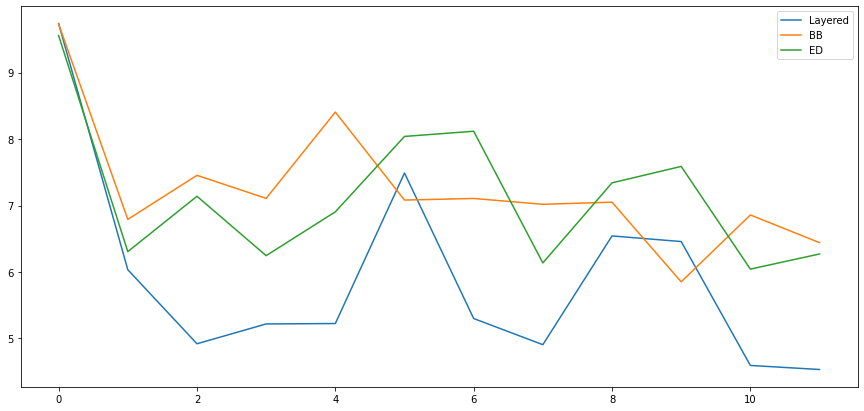

9493 13
8520 12
8881 12


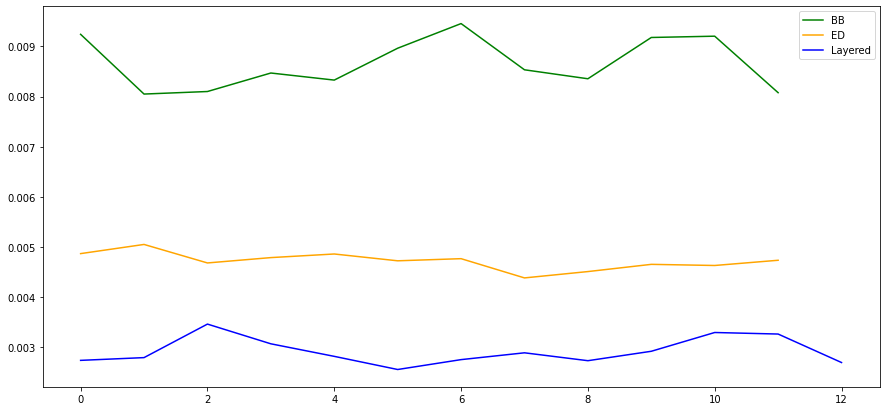

7199 12
7345 13
7199 12


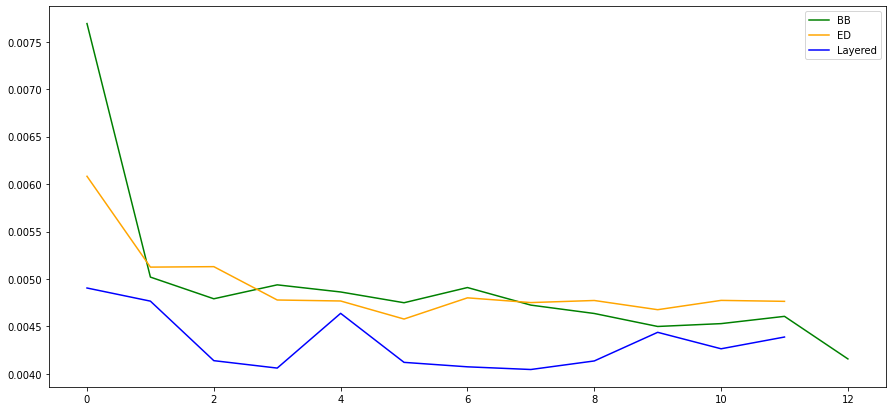

719 12
735 13
719 12


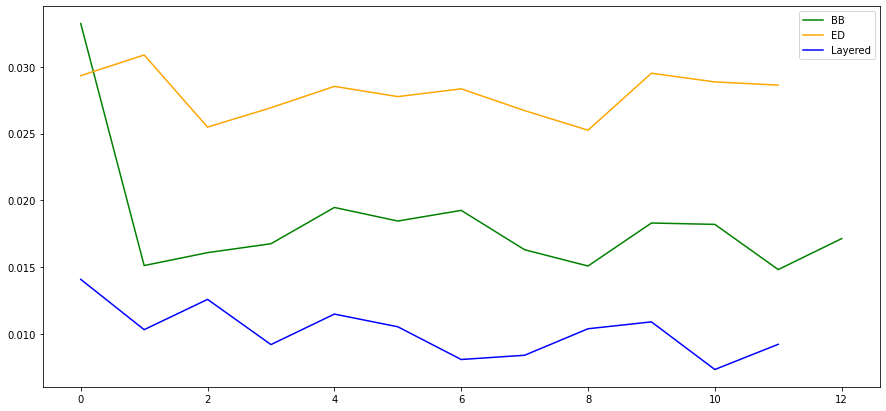

718 12
734 13
718 12


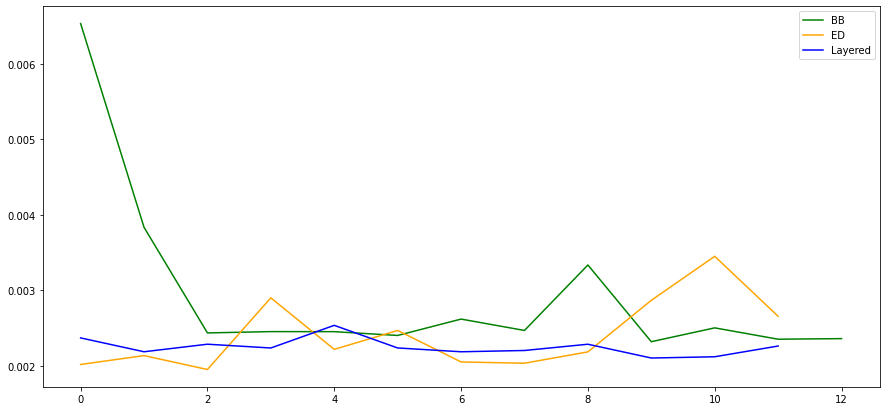

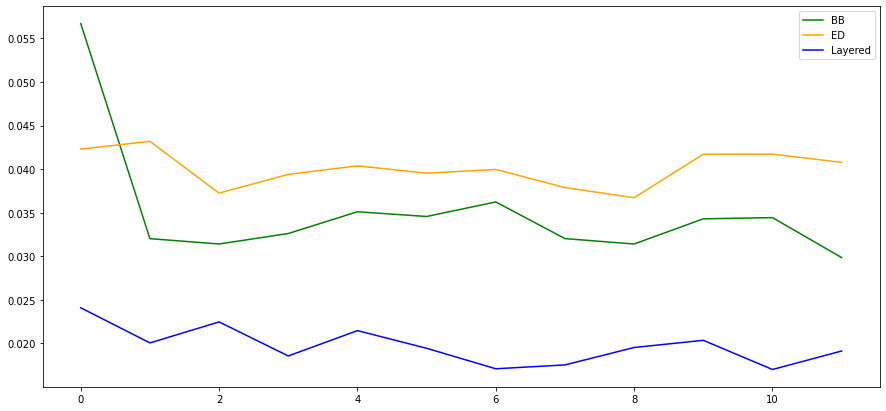

In [22]:
plt.rcParams["figure.figsize"] = (15,7)

dat1 = loader2h.data["CONSUMPTION_LY"]
dat2 = loader2h.data["CONSUMPTION_BB"]
dat3 = loader2h.data["CONSUMPTION_ED"]

print(len(dat1))

#print(dat)
#print(ag)
plt.plot(dat1, label="Layered")
plt.plot(dat2, label="BB")
plt.plot(dat3, label="ED")
plt.legend()
plt.show()

# ================== MONITOR =======================

dat1_monitor = mean_aggregation(loader2h.data["MONITOR_LAYERED_RESPTIME"], n = 750)
dat2_monitor = mean_aggregation(loader2h.data["MONITOR_BB_RESPTIME"], n = 750)
dat3_monitor = mean_aggregation(loader2h.data["MONITOR_ED_RESPTIME"], n = 750)

print(len(loader2h.data["MONITOR_LAYERED_RESPTIME"]), len(dat1_monitor))
print(len(loader2h.data["MONITOR_BB_RESPTIME"]), len(dat2_monitor))
print(len(loader2h.data["MONITOR_ED_RESPTIME"]), len(dat3_monitor))

plt.plot(dat2_monitor, label="BB", color = "green")
plt.plot(dat3_monitor, label="ED", color = "orange")
plt.plot(dat1_monitor, label="Layered", color = "blue")
plt.legend()
plt.show()


# ================== ANALYZER =======================

dat1_analyzer = mean_aggregation(loader2h.data["ANALYZER_LAYERED_RESPTIME"], n = 600)
dat2_analyzer = mean_aggregation(loader2h.data["ANALYZER_BB_RESPTIME"], n = 600)
dat3_analyzer = mean_aggregation(loader2h.data["ANALYZER_ED_RESPTIME"], n = 600)

print(len(loader2h.data["ANALYZER_LAYERED_RESPTIME"]), len(dat1_analyzer))
print(len(loader2h.data["ANALYZER_BB_RESPTIME"]), len(dat2_analyzer))
print(len(loader2h.data["ANALYZER_ED_RESPTIME"]), len(dat3_analyzer))

plt.plot(dat2_analyzer, label="BB", color = "green")
plt.plot(dat3_analyzer, label="ED", color = "orange")
plt.plot(dat1_analyzer, label="Layered", color = "blue")
plt.legend()
plt.show()


# ================== PLANNER =======================

dat1_planner = mean_aggregation(loader2h.data["PLANNER_LAYERED_RESPTIME"], n = 60)
dat2_planner = mean_aggregation(loader2h.data["PLANNER_BB_RESPTIME"], n = 60)
dat3_planner = mean_aggregation(loader2h.data["PLANNER_ED_RESPTIME"], n = 60)

print(len(loader2h.data["PLANNER_LAYERED_RESPTIME"]), len(dat1_planner))
print(len(loader2h.data["PLANNER_BB_RESPTIME"]), len(dat2_planner))
print(len(loader2h.data["PLANNER_ED_RESPTIME"]), len(dat3_planner))

plt.plot(dat2_planner, label="BB", color = "green")
plt.plot(dat3_planner, label="ED", color = "orange")
plt.plot(dat1_planner, label="Layered", color = "blue")
plt.legend()
plt.show()


# ================== EXECUTOR =======================

dat1_executor = mean_aggregation(loader2h.data["EXECUTOR_LAYERED_RESPTIME"], n = 60)
dat2_executor = mean_aggregation(loader2h.data["EXECUTOR_BB_RESPTIME"], n = 60)
dat3_executor = mean_aggregation(loader2h.data["EXECUTOR_ED_RESPTIME"], n = 60)

print(len(loader2h.data["EXECUTOR_LAYERED_RESPTIME"]), len(dat1_executor))
print(len(loader2h.data["EXECUTOR_BB_RESPTIME"]), len(dat2_executor))
print(len(loader2h.data["EXECUTOR_ED_RESPTIME"]), len(dat3_executor))

plt.plot(dat2_executor, label="BB", color = "green")
plt.plot(dat3_executor, label="ED", color = "orange")
plt.plot(dat1_executor, label="Layered", color = "blue")
plt.legend()
plt.show()

def align(mon, an, pl, ex):
    ln = min(len(mon), len(an), len(pl), len(ex))
    return mon[:ln], an[:ln], pl[:ln], ex[:ln]

def sum_up(mon, an, pl, ex):
    mon, an, pl, ex = align(mon, an, pl, ex)
    res = np.add(np.add(np.add(mon, an), pl), ex)
    return res



dat1 = sum_up(dat1_monitor, dat1_analyzer, dat1_planner, dat1_executor)
dat2 = sum_up(dat2_monitor, dat2_analyzer, dat2_planner, dat2_executor)
dat3 = sum_up(dat3_monitor, dat3_analyzer, dat3_planner, dat3_executor)

# ================== TOTAL RESPONSE TIME =======================

# dat1 = dat1_monitor + dat1_analyzer + dat1_planner + dat1_executor
# dat2 = dat2_monitor + dat2_analyzer + dat2_planner + dat2_executor
# dat3 = dat3_monitor + dat3_analyzer + dat3_planner + dat3_executor

# print(len(loader2h.data["EXECUTOR_LAYERED_RESPTIME"]), len(dat1))
# print(len(loader2h.data["EXECUTOR_BB_RESPTIME"]), len(dat2))
# print(len(loader2h.data["EXECUTOR_ED_RESPTIME"]), len(dat3))

plt.plot(dat2, label="BB", color = "green")
plt.plot(dat3, label="ED", color = "orange")
plt.plot(dat1, label="Layered", color = "blue")
plt.legend()
plt.show()

In [13]:
import pandas as pd
import numpy as np
from UtilityAnalyzer import UtilityAnalyzer
import os
import csv
from statistics import mean

class DataLoader:

    def __init__(self, parent_folder):
        self.parent_folder = parent_folder
        self.BB_Folder = "BB"
        self.ED_Folder = "ED"
        self.LI_Folder = "LY"
        self.consumption_files = [
            [self.parent_folder + "/LY/processed_data.csv"], 
            [self.parent_folder + "/BB/processed_data.csv"], 
            [self.parent_folder + "/ED/processed_data.csv"], 
            [self.parent_folder + "/STD/processed_data.csv"]
        ]
        self.data = {}

    def mean_aggregation(self, data, n = 10):
        #return list(np.mean(data.reshape(-1, num), axis=1))
        xp = np.r_[data, np.nan + np.zeros((-len(data) % n,))]
        return np.nanmean(xp.reshape(-1, n), axis=-1)
        #return list(itertools.chain.from_iterable([i]*n for i in [sum(data[i:i+n])//n for i in range(0,len(data),n)]))

    def align(self, mon, an, pl, ex):
        ln = min(len(mon), len(an), len(pl), len(ex))
        return mon[:ln], an[:ln], pl[:ln], ex[:ln]

    def sum_up(self, mon, an, pl, ex):
        mon, an, pl, ex = self.align(mon, an, pl, ex)
        res = np.add(np.add(np.add(mon, an), pl), ex)
        return res
    
    def read_consumption_files(self, files, timeword = "Time", with_input = False, separator = ';', interval = 10):
        count = 0
        row_list = ""

        sm_ly = []

        for file in files:
            print("ANALYZING FILE", file)
            with open(file) as csv_file:
                csv_reader = csv.reader(csv_file, delimiter=',')
                c = 0
                for row in csv.reader(iter(csv_file.readline,'')):
                    if count > 1:
                        if len(row)>0:
                            text = ','.join(row)
                            if not timeword in text:
                                
                                #print(count)
                                #print(text)
                                #input()
                                row_list = row_list + text
                                line_data = row_list
                                data_array = line_data.split(',')
                                #print(data_array)
                                #input()
                                #if(len(data_array)>23):
                                #print(data_array)
                                #print(count)
                                ts = data_array[0]
                                vals = [float(i) for i in data_array[1:-1] if '-' not in i]
                                #print (len(line_data.split(";")))
                                row_list=""
                                #print(line_data.split(";"))
                                sm_ly.append(sum(vals))
                                #print("len", len(sm_ly))
                                #sm_ly.append(mean(vals))
                    count+=1

        #print(sm_ly)
        dat = np.add.reduceat(sm_ly, np.arange(0, len(sm_ly), interval))
        print("Numrows", len(dat))
        return dat

    def load(self):

        if self.parent_folder == "24h":
            interval = 10
            mon_interval = 16
            an_interval = 10
            pl_interval = 1
            ex_interval = 1
        else:
            mon_interval = 750
            an_interval = 600
            pl_interval = 60
            ex_interval = 60
            interval = 600

        print("Loading...")
        self.data["MONITOR_LAYERED_RESPTIME"] = self.mean_aggregation(pd.read_csv(self.parent_folder + '/' + self.LI_Folder + '/MonitorRT_.txt', delimiter=";", header=None).values[0][:-1], n = mon_interval)
        self.data["MONITOR_LAYERED_CPUTIME"] = self.mean_aggregation(pd.read_csv(self.parent_folder + '/' + self.LI_Folder + '/MonitorCPU_.txt', delimiter=";", header=None).values[0][:-1], n = mon_interval)
        self.data["MONITOR_BB_RESPTIME"] = self.mean_aggregation(pd.read_csv(self.parent_folder + '/' + self.BB_Folder + '/MonitorRT_.txt', delimiter=";", header=None).values[0][:-1], n = mon_interval)
        self.data["MONITOR_BB_CPUTIME"] = self.mean_aggregation(pd.read_csv(self.parent_folder + '/' + self.BB_Folder + '/MonitorCPU_.txt', delimiter=";", header=None).values[0][:-1], n = mon_interval)
        self.data["MONITOR_ED_RESPTIME"] = self.mean_aggregation(pd.read_csv(self.parent_folder + '/' + self.ED_Folder + '/MonitorRT_.txt', delimiter=";", header=None).values[0][:-1], n = mon_interval)
        self.data["MONITOR_ED_CPUTIME"] = self.mean_aggregation(pd.read_csv(self.parent_folder + '/' + self.ED_Folder + '/MonitorCPU_.txt', delimiter=";", header=None).values[0][:-1], n = mon_interval)
        print("Monitor data loaded!")
        self.data["ANALYZER_LAYERED_RESPTIME"] = self.mean_aggregation(pd.read_csv(self.parent_folder + '/' + self.LI_Folder + '/AnalyzerRT_.txt', delimiter=";", header=None).values[0][:-1], n = an_interval)
        self.data["ANALYZER_LAYERED_CPUTIME"] = self.mean_aggregation(pd.read_csv(self.parent_folder + '/' + self.LI_Folder + '/AnalyzerCPU_.txt', delimiter=";", header=None).values[0][:-1], n = an_interval)
        self.data["ANALYZER_BB_RESPTIME"] = self.mean_aggregation(pd.read_csv(self.parent_folder + '/' + self.BB_Folder + '/AnalyzerRT_.txt', delimiter=";", header=None).values[0][:-1], n = an_interval)
        self.data["ANALYZER_BB_CPUTIME"] = self.mean_aggregation(pd.read_csv(self.parent_folder + '/' + self.BB_Folder + '/AnalyzerCPU_.txt', delimiter=";", header=None).values[0][:-1], n = an_interval)
        self.data["ANALYZER_ED_RESPTIME"] = self.mean_aggregation(pd.read_csv(self.parent_folder + '/' + self.ED_Folder + '/AnalyzerRT_.txt', delimiter=";", header=None).values[0][:-1], n = an_interval)
        self.data["ANALYZER_ED_CPUTIME"] = self.mean_aggregation(pd.read_csv(self.parent_folder + '/' + self.ED_Folder + '/AnalyzerCPU_.txt', delimiter=";", header=None).values[0][:-1], n = an_interval)
        print("Analyzer data loaded!")
        self.data["PLANNER_LAYERED_RESPTIME"] = self.mean_aggregation(pd.read_csv(self.parent_folder + '/' + self.LI_Folder + '/PlannerRT_.txt', delimiter=";", header=None).values[0][:-1], n = pl_interval)
        self.data["PLANNER_LAYERED_CPUTIME"] = self.mean_aggregation(pd.read_csv(self.parent_folder + '/' + self.LI_Folder + '/PlannerCPU_.txt', delimiter=";", header=None).values[0][:-1], n = pl_interval)
        self.data["PLANNER_BB_RESPTIME"] = self.mean_aggregation(pd.read_csv(self.parent_folder + '/' + self.BB_Folder + '/PlannerRT_.txt', delimiter=";", header=None).values[0][:-1], n = pl_interval)
        self.data["PLANNER_BB_CPUTIME"] = self.mean_aggregation(pd.read_csv(self.parent_folder + '/' + self.BB_Folder + '/PlannerCPU_.txt', delimiter=";", header=None).values[0][:-1], n = pl_interval)
        self.data["PLANNER_ED_RESPTIME"] = self.mean_aggregation(pd.read_csv(self.parent_folder + '/' + self.ED_Folder + '/PlannerRT_.txt', delimiter=";", header=None).values[0][:-1], n = pl_interval)
        self.data["PLANNER_ED_CPUTIME"] = self.mean_aggregation(pd.read_csv(self.parent_folder + '/' + self.ED_Folder + '/PlannerCPU_.txt', delimiter=";", header=None).values[0][:-1], n = pl_interval)
        print("Planner data loaded!")
        self.data["EXECUTOR_LAYERED_RESPTIME"] = self.mean_aggregation(pd.read_csv(self.parent_folder + '/' + self.LI_Folder + '/ExecutorRT_.txt', delimiter=";", header=None).values[0][:-1], n = ex_interval)
        self.data["EXECUTOR_BB_RESPTIME"] = self.mean_aggregation(pd.read_csv(self.parent_folder + '/' + self.BB_Folder + '/ExecutorRT_.txt', delimiter=";", header=None).values[0][:-1], n = ex_interval)
        self.data["EXECUTOR_ED_RESPTIME"] = self.mean_aggregation(pd.read_csv(self.parent_folder + '/' + self.ED_Folder + '/ExecutorRT_.txt', delimiter=";", header=None).values[0][:-1], n = ex_interval)
        self.data["EXECUTOR_LAYERED_CPUTIME"] = self.mean_aggregation(pd.read_csv(self.parent_folder + '/' + self.LI_Folder + '/ExecutorRT_.txt', delimiter=";", header=None).values[0][:-1], n = ex_interval)
        self.data["EXECUTOR_BB_CPUTIME"] = self.mean_aggregation(pd.read_csv(self.parent_folder + '/' + self.BB_Folder + '/ExecutorRT_.txt', delimiter=";", header=None).values[0][:-1], n = ex_interval)
        self.data["EXECUTOR_ED_CPUTIME"] = self.mean_aggregation(pd.read_csv(self.parent_folder + '/' + self.ED_Folder + '/ExecutorRT_.txt', delimiter=";", header=None).values[0][:-1], n = ex_interval)
        print("Executor data loaded!")
        

        print("Interval", interval)
        self.data["CONSUMPTION_LY"] = self.read_consumption_files(self.consumption_files[0], interval = interval)
        self.data["CONSUMPTION_BB"] = self.read_consumption_files(self.consumption_files[1], interval = interval)
        self.data["CONSUMPTION_ED"] = self.read_consumption_files(self.consumption_files[2], interval = interval)
        self.data["CONSUMPTION_STD"] = self.read_consumption_files(self.consumption_files[3], interval = interval)
        print("Consumption data loaded! Success")

    def apply_utility(self, RT_Thresh, E_Thresh, verbose = 1):
        utility = UtilityAnalyzer()

        normalize_roof = max([max(v) for k, v in self.data.items()])

        RT_LY = utility.utility_function(self.sum_up(self.data["MONITOR_LAYERED_RESPTIME"], self.data["ANALYZER_LAYERED_RESPTIME"], self.data["PLANNER_LAYERED_RESPTIME"], self.data["EXECUTOR_LAYERED_RESPTIME"]), threshold = RT_Thresh)
        RT_BB = utility.utility_function(self.sum_up(self.data["MONITOR_BB_RESPTIME"], self.data["ANALYZER_BB_RESPTIME"], self.data["PLANNER_BB_RESPTIME"], self.data["EXECUTOR_BB_RESPTIME"]), threshold = RT_Thresh)
        RT_ED = utility.utility_function(self.sum_up(self.data["MONITOR_ED_RESPTIME"], self.data["ANALYZER_ED_RESPTIME"], self.data["PLANNER_ED_RESPTIME"], self.data["EXECUTOR_ED_RESPTIME"]), threshold = RT_Thresh)


        ln = min(len(self.data["CONSUMPTION_LY"]), len(self.data["CONSUMPTION_BB"]), len(self.data["CONSUMPTION_ED"]), len(self.data["CONSUMPTION_STD"]))

        __consumption = [
            utility.utility_function(self.data["CONSUMPTION_LY"][:ln], threshold = E_Thresh, roof = 25, min_val = 10),
            utility.utility_function(self.data["CONSUMPTION_BB"][:ln], threshold = E_Thresh, roof = 25, min_val = 10),
            utility.utility_function(self.data["CONSUMPTION_ED"][:ln], threshold = E_Thresh, roof = 25, min_val = 10),
            utility.utility_function(self.data["CONSUMPTION_STD"][:ln], threshold = E_Thresh, roof = 25 ,min_val = 10)
        ]


        #print("VALUES", RT_LY, RT_BB, RT_ED)
        RRT_LY = utility.reverse(RT_LY)
        RRT_BB = utility.reverse(RT_BB)
        RRT_ED = utility.reverse(RT_ED)


        ROI_LY = np.divide(__consumption[0][:min(len(RRT_LY), len(__consumption[0]))], RRT_LY[:min(len(RRT_LY), len(__consumption[0]))])
        ROI_BB = np.divide(__consumption[1][:min(len(RRT_BB), len(__consumption[1]))], RRT_BB[:min(len(RRT_BB), len(__consumption[1]))])
        ROI_ED = np.divide(__consumption[2][:min(len(RRT_ED), len(__consumption[2]))], RRT_ED[:min(len(RRT_ED), len(__consumption[2]))])

        CROI_LY = utility.cumulate_data(ROI_LY)
        CROI_BB = utility.cumulate_data(ROI_BB)
        CROI_ED = utility.cumulate_data(ROI_ED)

        print("Accumulated ROI for different strategies")
        print("THRESHOLDS:", "RT", RT_Thresh, "ENERGY", E_Thresh)
        print("Layered", sum(ROI_LY))
        print("Centralized", sum(ROI_BB))
        print("Event Driven", sum(ROI_ED))

        print("TOTAL AVERAGE RESPONSE TIME LY", sum(RT_LY) / len(RT_LY))
        print("TOTAL AVERAGE RESPONSE TIME BB", sum(RT_BB) / len(RT_BB))
        print("TOTAL AVERAGE RESPONSE TIME ED", sum(RT_ED) / len(RT_ED))
        print("TOTAL ENERGY CONSUMER LY", sum(__consumption[0]))
        print("TOTAL ENERGY CONSUMER BB", sum(__consumption[1]))
        print("TOTAL ENERGY CONSUMER ED", sum(__consumption[2]))


        return RT_LY, RT_BB, RT_ED, __consumption, CROI_LY, CROI_BB, CROI_ED


In [14]:
from sklearn.preprocessing import MinMaxScaler

class UtilityAnalyzer:

    def utility_function(self, data, threshold = 0.04, penality = 1, roof = 3, min_val = 2):
        #print(data[:10])
        _result = []
        for val in data:
            if val >= threshold:
                _result.append((threshold - val))
            else:
                _result.append((threshold - val))
        #print(_result[:10])
        #print("OLD DATA", _result[-5:])
        #print("MIN VALUE", min(_result))
        #return _result
        _result_ = [float(i) + min_val for i in _result]

        normalized = [float(i)/roof for i in _result_]
        #print("NORMALIZED DATA", normalized[-5:])
        #return normalized
        return normalized

    def cumulate_data(self, data):
        _result, act_sum = [], 0
        for idx, val in enumerate(data):
            if idx == 0:
                _result.append(data[0])
                act_sum = data[0]
            else:
                #print(act_sum)
                _result.append(act_sum + val)
                act_sum += val
        #return _result
        #print("OLD DATA", _result[-5:])
        #scaler = MinMaxScaler()
        #scaler.fit(_result)
        #normalized = scaler.transform(_result)
        #normalized = [float(i)/_result[-1] for i in _result]
        #print("NORMALIZED DATA", normalized[-5:])
        #return normalized
        return _result

    def reverse(self, data):
        _reversed = [1 - item for item in data]
        return _reversed

In [15]:
loader24h = DataLoader("24h")
loader24h.load()

loader2h = DataLoader("2h")
loader2h.load()


Loading...
Monitor data loaded!
Analyzer data loaded!
Planner data loaded!
Executor data loaded!
Interval 10
ANALYZING FILE 24h/LY/processed_data.csv
Numrows 144
ANALYZING FILE 24h/BB/processed_data.csv
Numrows 144
ANALYZING FILE 24h/ED/processed_data.csv
Numrows 144
ANALYZING FILE 24h/STD/processed_data.csv
Numrows 144
Consumption data loaded! Success
Loading...
Monitor data loaded!
Analyzer data loaded!
Planner data loaded!
Executor data loaded!
Interval 600
ANALYZING FILE 2h/LY/processed_data.csv
Numrows 12
ANALYZING FILE 2h/BB/processed_data.csv
Numrows 12
ANALYZING FILE 2h/ED/processed_data.csv
Numrows 12
ANALYZING FILE 2h/STD/processed_data.csv
Numrows 12
Consumption data loaded! Success


In [125]:
RT_LY, RT_BB, RT_ED, cons = loader2.apply_utility(RT_Thresh = 0.6, E_Thresh = 15, verbose = 1)

In [126]:
print(len(RT_LY))
print(len(RT_BB))
print(len(RT_ED))

print(loader2.data["CONSUMPTION_LY"])

print(RT_LY)

12
12
12
[9.7362336 6.0342232 4.9204576 5.2184424 5.2246224 7.4889544 5.3000928
 4.9066536 6.5423576 6.4578256 4.5945088 4.5333   ]
[0.8586356675624849, 0.8599802075492011, 0.8591772972477808, 0.8604789605405596, 0.859509249581231, 0.86018521894349, 0.8609686124589708, 0.8608214368820191, 0.8601550951533848, 0.8598806649314034, 0.860996825668547, 0.8602892104664873]


In [138]:
RT_LY, RT_BB, RT_ED, cons = loader24.apply_utility(RT_Thresh = 0.5, E_Thresh = 18, verbose = 1)
print(len(RT_LY))
print(len(RT_BB))
print(len(RT_ED))

print(RT_LY)
print(cons[0])

142
142
141
[0.8301326900720597, 0.8033011585474016, 0.8280853788057964, 0.8282146364450456, 0.8272947857777279, 0.823011076450348, 0.8280111372470856, 0.823397496342659, 0.8244915157556534, 0.8274445682764053, 0.8243739893039068, 0.8215070178111396, 0.8229130784670513, 0.8277859389781952, 0.8285851667324703, 0.8235183586676916, 0.8270654569069545, 0.8283236751953762, 0.8256952385107676, 0.8215904156366984, 0.823082862297694, 0.8211180210113526, 0.8275121867656708, 0.8216758728027345, 0.8187976400057475, 0.8240459591150285, 0.8261839201052984, 0.8223702877759934, 0.8238582342863084, 0.8230285316705704, 0.8224008083343506, 0.8262181540330252, 0.8279130578041077, 0.8258426119883856, 0.8237894912560781, 0.8277192423741023, 0.8261808057626089, 0.8221291343371074, 0.8161531299352647, 0.8236448287963868, 0.8258998612562816, 0.8281129638353985, 0.8207816431919733, 0.827632780869802, 0.8281694620847703, 0.8224925041198731, 0.8260682821273804, 0.8266152958075206, 0.8260392556587856, 0.823073229

In [139]:
ROI_LY = np.divide(cons[0][:min(len(RT_LY), len(cons[0]))], RT_LY[:min(len(RT_LY), len(cons[0]))])
ROI_BB = np.divide(cons[1][:min(len(RT_BB), len(cons[1]))], RT_BB[:min(len(RT_BB), len(cons[1]))])
ROI_ED = np.divide(cons[2][:min(len(RT_ED), len(cons[2]))], RT_ED[:min(len(RT_ED), len(cons[2]))])

In [140]:
ROI_LY

array([-0.10191431,  0.39153774,  0.80380092,  0.66550517,  0.64951397,
        0.54522678,  0.78199515,  0.49329448,  0.35869297,  0.96183336,
        0.52186392,  0.46379984,  0.47596687,  0.380102  ,  0.45191695,
        0.41904552,  0.49450712,  0.42808644,  0.42556971,  0.44180262,
        0.40340907,  0.5207925 ,  0.289904  ,  0.46148137,  0.81608058,
        0.24726543,  0.30927506,  0.45014181,  0.47253819,  0.4934608 ,
        0.43487623,  0.4808026 ,  0.3174401 ,  0.7872713 ,  0.73391559,
        0.39122541,  0.3595408 ,  0.47352023,  0.45564338,  0.51332184,
        0.36039494,  0.41452444,  0.39662427,  0.41336001,  0.33414482,
        0.48233381,  0.29076311,  0.81472069,  0.35196319,  0.43367112,
        0.21906883,  0.25982646,  0.44647691,  0.32657927,  0.43746819,
        0.43567119,  0.55368668,  0.32111283,  0.37804034,  0.47164084,
        0.41321107,  0.49568646,  0.56671787,  0.31229889,  0.41442506,
        0.34130962,  0.36783834,  0.52004098,  0.54121253,  0.38

In [113]:
ROI_LY = np.divide(loader2.data["CONSUMPTION_LY"][:min(len(RT_LY), len(loader2.data["CONSUMPTION_LY"]))], RT_LY[:min(len(RT_LY), len(loader2.data["CONSUMPTION_LY"]))])
ROI_BB = np.divide(loader2.data["CONSUMPTION_BB"][:min(len(RT_BB), len(loader2.data["CONSUMPTION_BB"]))], RT_BB[:min(len(RT_BB), len(loader2.data["CONSUMPTION_BB"]))])
ROI_ED = np.divide(loader2.data["CONSUMPTION_ED"][:min(len(RT_ED), len(loader2.data["CONSUMPTION_ED"]))], RT_ED[:min(len(RT_ED), len(loader2.data["CONSUMPTION_ED"]))])


In [145]:
ROI_LY

array([-0.10191431,  0.39153774,  0.80380092,  0.66550517,  0.64951397,
        0.54522678,  0.78199515,  0.49329448,  0.35869297,  0.96183336,
        0.52186392,  0.46379984,  0.47596687,  0.380102  ,  0.45191695,
        0.41904552,  0.49450712,  0.42808644,  0.42556971,  0.44180262,
        0.40340907,  0.5207925 ,  0.289904  ,  0.46148137,  0.81608058,
        0.24726543,  0.30927506,  0.45014181,  0.47253819,  0.4934608 ,
        0.43487623,  0.4808026 ,  0.3174401 ,  0.7872713 ,  0.73391559,
        0.39122541,  0.3595408 ,  0.47352023,  0.45564338,  0.51332184,
        0.36039494,  0.41452444,  0.39662427,  0.41336001,  0.33414482,
        0.48233381,  0.29076311,  0.81472069,  0.35196319,  0.43367112,
        0.21906883,  0.25982646,  0.44647691,  0.32657927,  0.43746819,
        0.43567119,  0.55368668,  0.32111283,  0.37804034,  0.47164084,
        0.41321107,  0.49568646,  0.56671787,  0.31229889,  0.41442506,
        0.34130962,  0.36783834,  0.52004098,  0.54121253,  0.38

In [144]:
ROI_BB

array([-0.10380184,  0.3677043 ,  0.94233135,  0.48535717,  0.41852976,
        0.36386089,  0.3940011 ,  0.98911329,  0.44296994,  0.39339072,
        0.98522106,  0.5144154 ,  0.31744499,  0.93619336,  0.49125265,
        0.40168274,  0.86665968,  0.35261971,  0.44361868,  0.42675704,
        0.29572615,  1.03617645,  0.31176873,  0.44714416,  0.44653123,
        0.37878131,  0.92082379,  0.48319636,  0.48359978,  0.54465285,
        0.41173023,  0.50557583,  0.30411069,  0.93943568,  0.37822917,
        0.37972102,  0.36398076,  0.36858494,  0.83566668,  0.36372032,
        0.37202206,  0.44917961,  0.39862415,  0.94452666,  0.3898064 ,
        0.38617442,  0.83821658,  0.69179764,  0.59290818,  0.68905744,
        0.55422371,  0.71929993,  0.46595111,  0.30565603,  0.44345987,
        0.42310321,  0.8783434 ,  0.22975212,  0.38403858,  0.53730762,
        0.38274929,  0.48444966,  0.542674  ,  0.43286594,  0.31312351,
        0.39064795,  0.30843529,  0.5556811 ,  0.49968778,  0.49

In [146]:
ROI_ED

array([-1.06372942e-01, -1.49714260e-01,  7.81092443e-01,  7.24807783e-01,
        6.64741302e-01,  8.59769980e-01,  1.17523131e-02,  8.98705193e-01,
        7.04708808e-01,  6.75743003e-01,  1.99891360e-02,  8.79770240e-01,
       -1.58390776e-02,  7.96114514e-01, -3.88693057e-03,  8.74416437e-01,
        1.33860023e-01,  8.89887663e-01,  5.09260936e-02,  8.89565181e-01,
        6.34866597e-01,  1.35470820e-01,  7.75811160e-01,  9.71483472e-02,
        8.66207094e-01, -4.32751974e-02,  8.12048151e-01,  3.72086880e-02,
        8.84299581e-01,  4.37166378e-02,  8.56267225e-01, -2.25634076e-03,
        8.11816609e-01, -2.60621560e-02,  8.14891323e-01, -3.37319268e-02,
        8.18054527e-01,  1.12635504e-02,  8.71685588e-01,  1.10339265e-01,
        8.72589210e-01,  2.06838036e-02,  8.75700898e-01, -4.81822646e-02,
        7.93278996e-01,  5.64814385e-02,  9.22267247e-01,  5.66501983e-02,
        8.20882078e-01,  9.74723386e-02,  7.87603992e-01, -9.76994059e-02,
        8.66367405e-01, -

In [141]:
sum(ROI_LY)

63.5449180007228

In [142]:
sum(ROI_BB)

70.18390703329469

In [143]:
sum(ROI_ED)

64.88013975816888

144


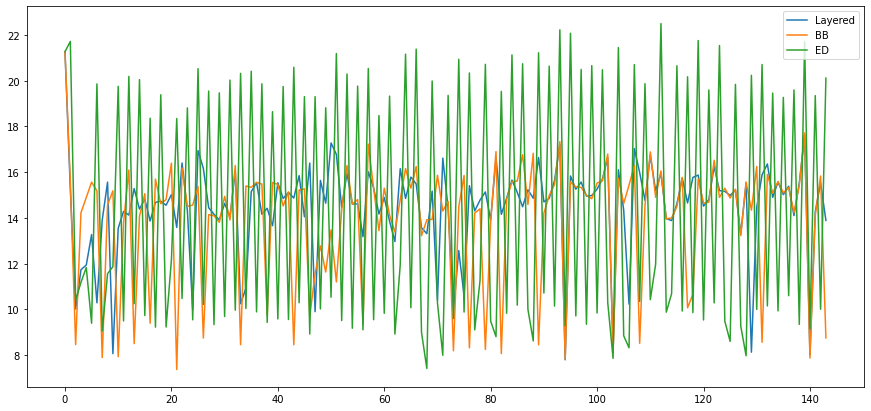

148 148
149 149
145 145


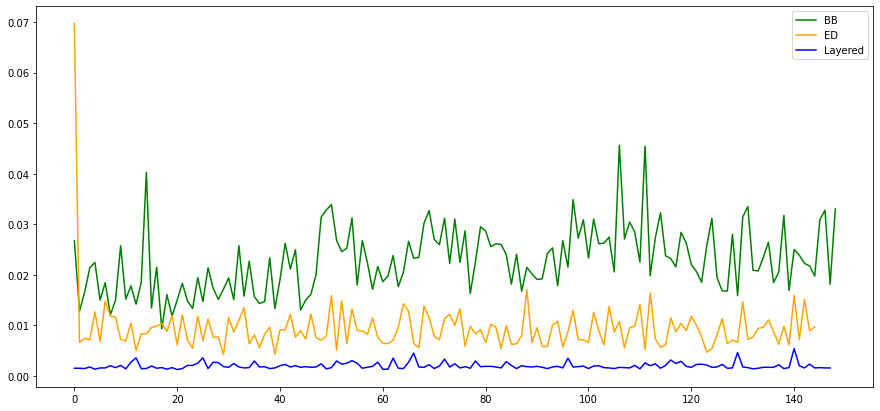

144 144
144 144
144 144


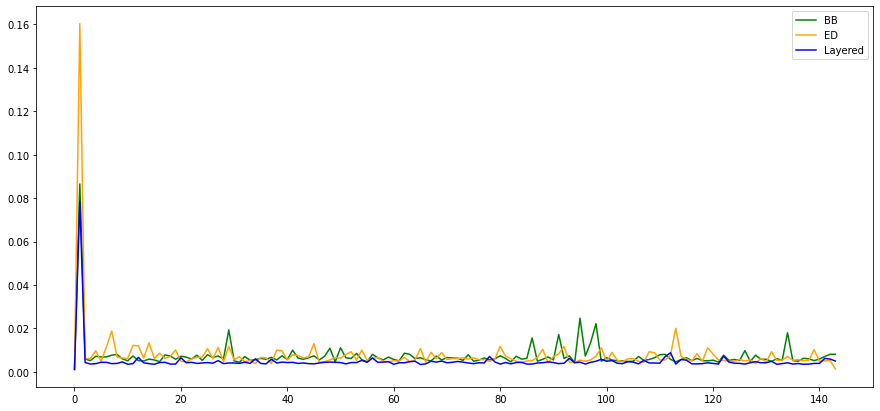

143 143
143 143
142 142


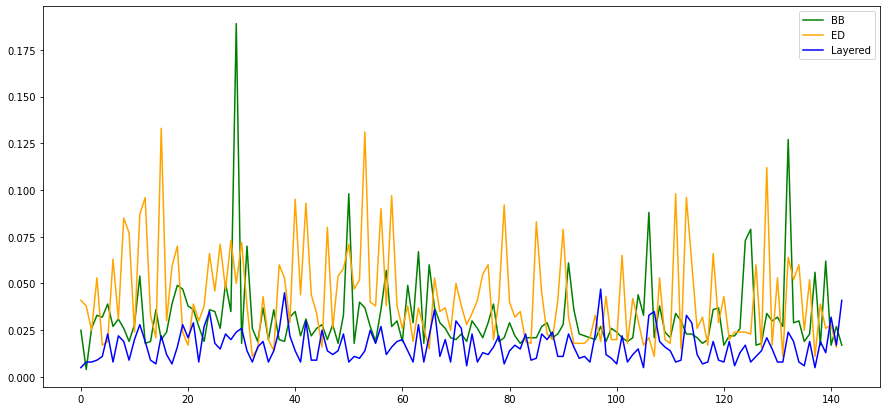

142 142
142 142
141 141


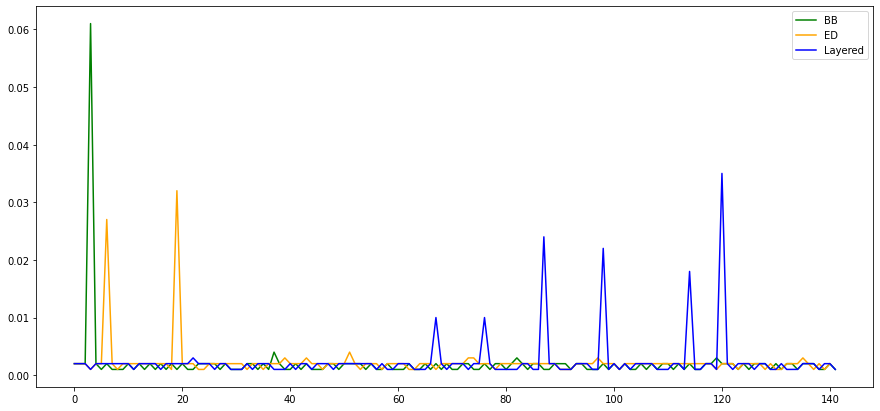

============ TOTAL RESPONSE TIME ============


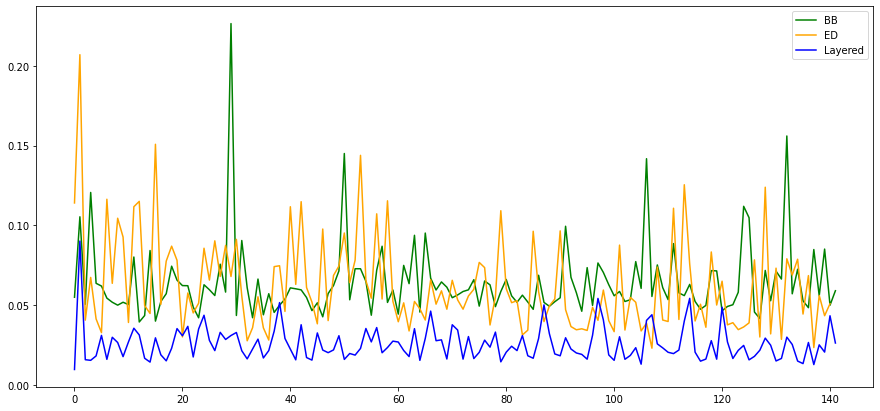

============ ENERGY CONSUMPTION ============


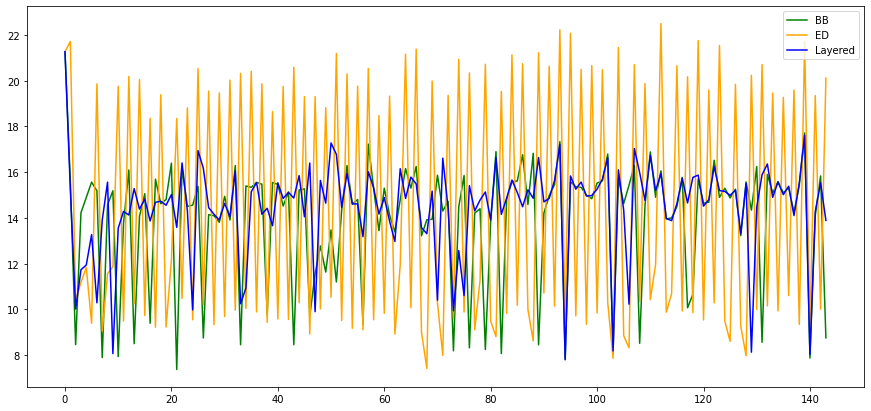

In [39]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,7)

dat1 = loader24h.data["CONSUMPTION_LY"]
dat2 = loader24h.data["CONSUMPTION_BB"]
dat3 = loader24h.data["CONSUMPTION_ED"]

print(len(dat1))

#print(dat)
#print(ag)
plt.plot(dat1, label="Layered")
plt.plot(dat2, label="BB")
plt.plot(dat3, label="ED")
plt.legend()
plt.show()

# ================== MONITOR =======================

dat1_monitor = loader24h.data["MONITOR_LAYERED_RESPTIME"]
dat2_monitor = loader24h.data["MONITOR_BB_RESPTIME"]
dat3_monitor = loader24h.data["MONITOR_ED_RESPTIME"]

print(len(loader24h.data["MONITOR_LAYERED_RESPTIME"]), len(dat1_monitor))
print(len(loader24h.data["MONITOR_BB_RESPTIME"]), len(dat2_monitor))
print(len(loader24h.data["MONITOR_ED_RESPTIME"]), len(dat3_monitor))

plt.plot(dat2_monitor, label="BB", color = "green")
plt.plot(dat3_monitor, label="ED", color = "orange")
plt.plot(dat1_monitor, label="Layered", color = "blue")
plt.legend()
plt.show()


# ================== ANALYZER =======================

dat1_analyzer = loader24h.data["ANALYZER_LAYERED_RESPTIME"]
dat2_analyzer = loader24h.data["ANALYZER_BB_RESPTIME"]
dat3_analyzer = loader24h.data["ANALYZER_ED_RESPTIME"]

print(len(loader24h.data["ANALYZER_LAYERED_RESPTIME"]), len(dat1_analyzer))
print(len(loader24h.data["ANALYZER_BB_RESPTIME"]), len(dat2_analyzer))
print(len(loader24h.data["ANALYZER_ED_RESPTIME"]), len(dat3_analyzer))

plt.plot(dat2_analyzer, label="BB", color = "green")
plt.plot(dat3_analyzer, label="ED", color = "orange")
plt.plot(dat1_analyzer, label="Layered", color = "blue")
plt.legend()
plt.show()


# ================== PLANNER =======================

dat1_planner = loader24h.data["PLANNER_LAYERED_RESPTIME"]
dat2_planner = loader24h.data["PLANNER_BB_RESPTIME"]
dat3_planner = loader24h.data["PLANNER_ED_RESPTIME"]

print(len(loader24h.data["PLANNER_LAYERED_RESPTIME"]), len(dat1_planner))
print(len(loader24h.data["PLANNER_BB_RESPTIME"]), len(dat2_planner))
print(len(loader24h.data["PLANNER_ED_RESPTIME"]), len(dat3_planner))

plt.plot(dat2_planner, label="BB", color = "green")
plt.plot(dat3_planner, label="ED", color = "orange")
plt.plot(dat1_planner, label="Layered", color = "blue")
plt.legend()
plt.show()


# ================== EXECUTOR =======================

dat1_executor = loader24h.data["EXECUTOR_LAYERED_RESPTIME"]
dat2_executor = loader24h.data["EXECUTOR_BB_RESPTIME"]
dat3_executor = loader24h.data["EXECUTOR_ED_RESPTIME"]

print(len(loader24h.data["EXECUTOR_LAYERED_RESPTIME"]), len(dat1_executor))
print(len(loader24h.data["EXECUTOR_BB_RESPTIME"]), len(dat2_executor))
print(len(loader24h.data["EXECUTOR_ED_RESPTIME"]), len(dat3_executor))

plt.plot(dat2_executor, label="BB", color = "green")
plt.plot(dat3_executor, label="ED", color = "orange")
plt.plot(dat1_executor, label="Layered", color = "blue")
plt.legend()
plt.show()

def align(mon, an, pl, ex):
    ln = min(len(mon), len(an), len(pl), len(ex))
    return mon[:ln], an[:ln], pl[:ln], ex[:ln]

def sum_up(mon, an, pl, ex):
    mon, an, pl, ex = align(mon, an, pl, ex)
    res = np.add(np.add(np.add(mon, an), pl), ex)
    return res



dat1 = sum_up(dat1_monitor, dat1_analyzer, dat1_planner, dat1_executor)
dat2 = sum_up(dat2_monitor, dat2_analyzer, dat2_planner, dat2_executor)
dat3 = sum_up(dat3_monitor, dat3_analyzer, dat3_planner, dat3_executor)

# ================== TOTAL RESPONSE TIME =======================

# dat1 = dat1_monitor + dat1_analyzer + dat1_planner + dat1_executor
# dat2 = dat2_monitor + dat2_analyzer + dat2_planner + dat2_executor
# dat3 = dat3_monitor + dat3_analyzer + dat3_planner + dat3_executor

# print(len(loader24h.data["EXECUTOR_LAYERED_RESPTIME"]), len(dat1))
# print(len(loader24h.data["EXECUTOR_BB_RESPTIME"]), len(dat2))
# print(len(loader24h.data["EXECUTOR_ED_RESPTIME"]), len(dat3))


print("============ TOTAL RESPONSE TIME ============")

plt.plot(dat2, label="BB", color = "green")
plt.plot(dat3, label="ED", color = "orange")
plt.plot(dat1, label="Layered", color = "blue")
plt.legend()
plt.show()

print("============ ENERGY CONSUMPTION ============")

plt.plot(loader24h.data["CONSUMPTION_BB"], label="BB", color = "green")
plt.plot(loader24h.data["CONSUMPTION_ED"], label="ED", color = "orange")
plt.plot(loader24h.data["CONSUMPTION_LY"], label="Layered", color = "blue")
plt.legend()
plt.show()

12


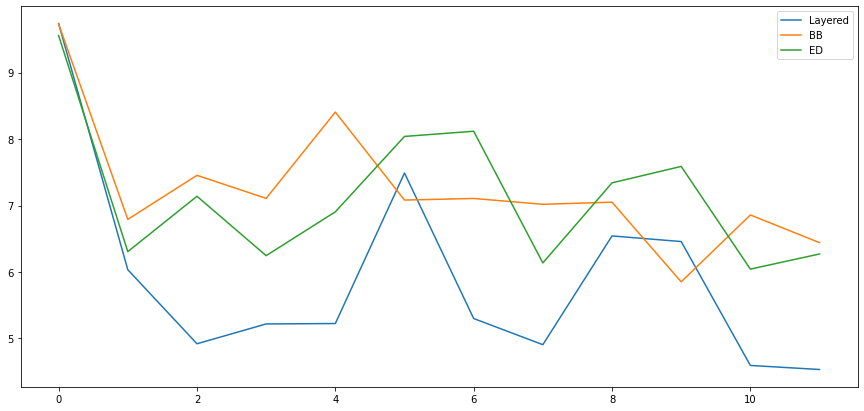

13 13
12 12
12 12


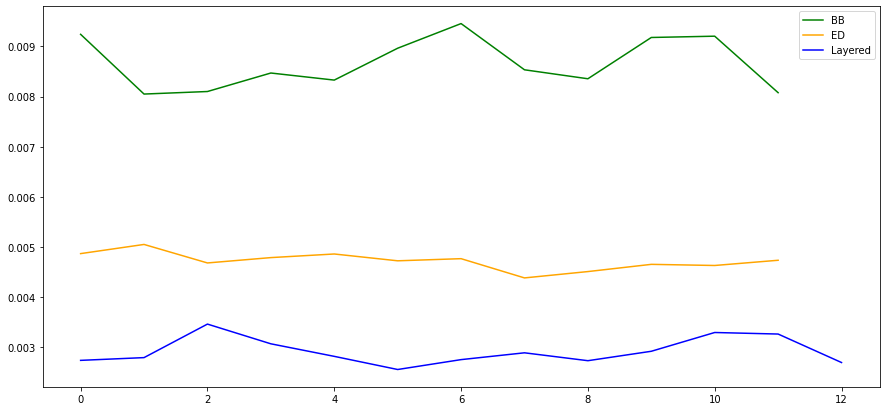

12 12
13 13
12 12


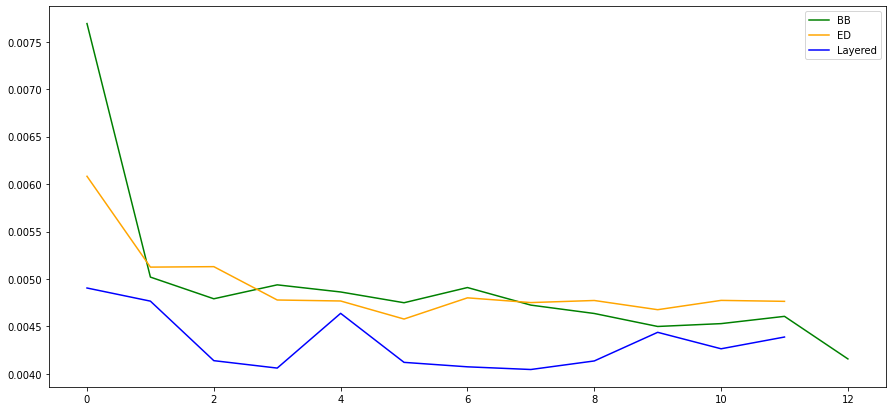

12 12
13 13
12 12


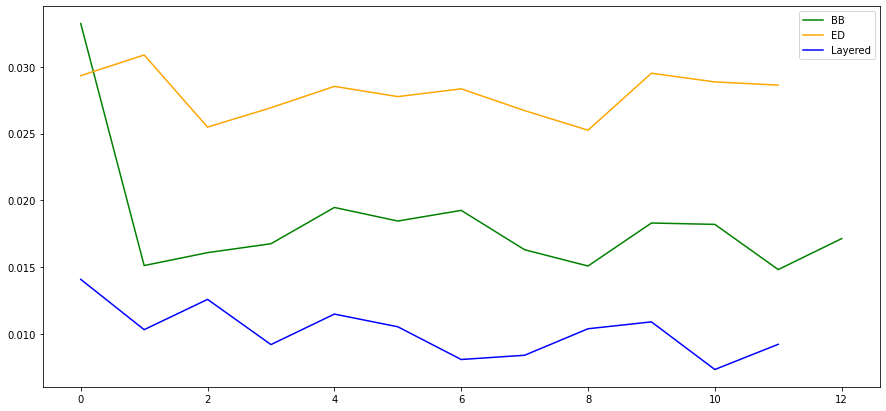

12 12
13 13
12 12


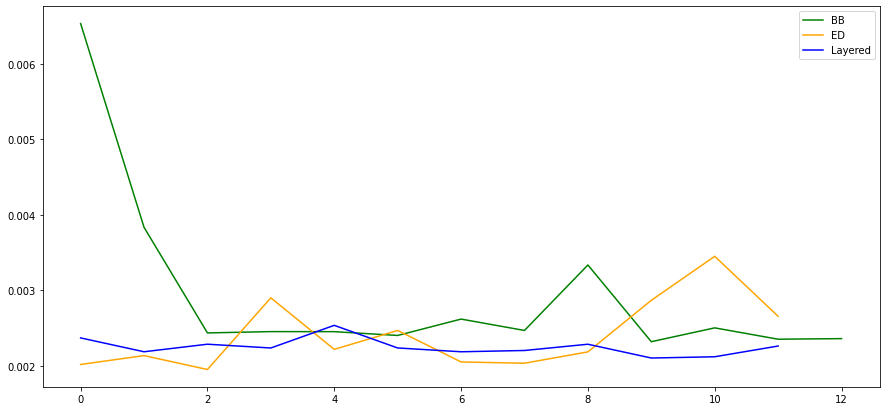

============ TOTAL RESPONSE TIME ============


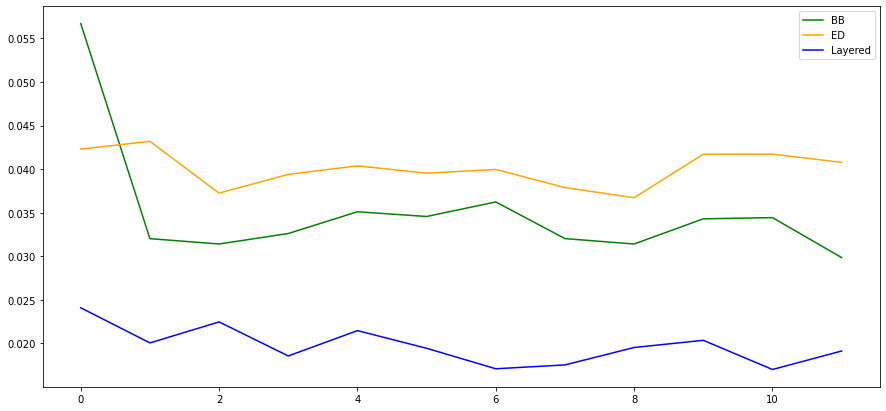

============ ENERGY CONSUMPTION ============


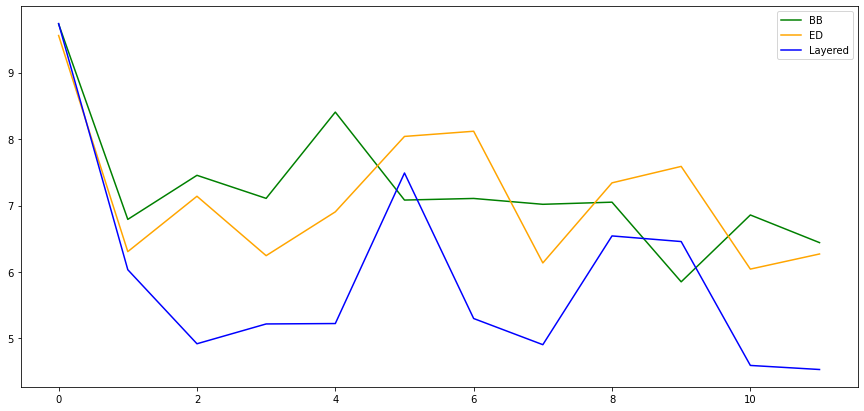

In [10]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,7)

dat1 = loader2h.data["CONSUMPTION_LY"]
dat2 = loader2h.data["CONSUMPTION_BB"]
dat3 = loader2h.data["CONSUMPTION_ED"]

print(len(dat1))

#print(dat)
#print(ag)
plt.plot(dat1, label="Layered")
plt.plot(dat2, label="BB")
plt.plot(dat3, label="ED")
plt.legend()
plt.show()

# ================== MONITOR =======================

dat1_monitor = loader2h.data["MONITOR_LAYERED_RESPTIME"]
dat2_monitor = loader2h.data["MONITOR_BB_RESPTIME"]
dat3_monitor = loader2h.data["MONITOR_ED_RESPTIME"]

print(len(loader2h.data["MONITOR_LAYERED_RESPTIME"]), len(dat1_monitor))
print(len(loader2h.data["MONITOR_BB_RESPTIME"]), len(dat2_monitor))
print(len(loader2h.data["MONITOR_ED_RESPTIME"]), len(dat3_monitor))

plt.plot(dat2_monitor, label="BB", color = "green")
plt.plot(dat3_monitor, label="ED", color = "orange")
plt.plot(dat1_monitor, label="Layered", color = "blue")
plt.legend()
plt.show()


# ================== ANALYZER =======================

dat1_analyzer = loader2h.data["ANALYZER_LAYERED_RESPTIME"]
dat2_analyzer = loader2h.data["ANALYZER_BB_RESPTIME"]
dat3_analyzer = loader2h.data["ANALYZER_ED_RESPTIME"]

print(len(loader2h.data["ANALYZER_LAYERED_RESPTIME"]), len(dat1_analyzer))
print(len(loader2h.data["ANALYZER_BB_RESPTIME"]), len(dat2_analyzer))
print(len(loader2h.data["ANALYZER_ED_RESPTIME"]), len(dat3_analyzer))

plt.plot(dat2_analyzer, label="BB", color = "green")
plt.plot(dat3_analyzer, label="ED", color = "orange")
plt.plot(dat1_analyzer, label="Layered", color = "blue")
plt.legend()
plt.show()


# ================== PLANNER =======================

dat1_planner = loader2h.data["PLANNER_LAYERED_RESPTIME"]
dat2_planner = loader2h.data["PLANNER_BB_RESPTIME"]
dat3_planner = loader2h.data["PLANNER_ED_RESPTIME"]

print(len(loader2h.data["PLANNER_LAYERED_RESPTIME"]), len(dat1_planner))
print(len(loader2h.data["PLANNER_BB_RESPTIME"]), len(dat2_planner))
print(len(loader2h.data["PLANNER_ED_RESPTIME"]), len(dat3_planner))

plt.plot(dat2_planner, label="BB", color = "green")
plt.plot(dat3_planner, label="ED", color = "orange")
plt.plot(dat1_planner, label="Layered", color = "blue")
plt.legend()
plt.show()


# ================== EXECUTOR =======================

dat1_executor = loader2h.data["EXECUTOR_LAYERED_RESPTIME"]
dat2_executor = loader2h.data["EXECUTOR_BB_RESPTIME"]
dat3_executor = loader2h.data["EXECUTOR_ED_RESPTIME"]

print(len(loader2h.data["EXECUTOR_LAYERED_RESPTIME"]), len(dat1_executor))
print(len(loader2h.data["EXECUTOR_BB_RESPTIME"]), len(dat2_executor))
print(len(loader2h.data["EXECUTOR_ED_RESPTIME"]), len(dat3_executor))

plt.plot(dat2_executor, label="BB", color = "green")
plt.plot(dat3_executor, label="ED", color = "orange")
plt.plot(dat1_executor, label="Layered", color = "blue")
plt.legend()
plt.show()

def align(mon, an, pl, ex):
    ln = min(len(mon), len(an), len(pl), len(ex))
    return mon[:ln], an[:ln], pl[:ln], ex[:ln]

def sum_up(mon, an, pl, ex):
    mon, an, pl, ex = align(mon, an, pl, ex)
    res = np.add(np.add(np.add(mon, an), pl), ex)
    return res



dat1 = sum_up(dat1_monitor, dat1_analyzer, dat1_planner, dat1_executor)
dat2 = sum_up(dat2_monitor, dat2_analyzer, dat2_planner, dat2_executor)
dat3 = sum_up(dat3_monitor, dat3_analyzer, dat3_planner, dat3_executor)

# ================== TOTAL RESPONSE TIME =======================

# dat1 = dat1_monitor + dat1_analyzer + dat1_planner + dat1_executor
# dat2 = dat2_monitor + dat2_analyzer + dat2_planner + dat2_executor
# dat3 = dat3_monitor + dat3_analyzer + dat3_planner + dat3_executor

# print(len(loader2h.data["EXECUTOR_LAYERED_RESPTIME"]), len(dat1))
# print(len(loader2h.data["EXECUTOR_BB_RESPTIME"]), len(dat2))
# print(len(loader2h.data["EXECUTOR_ED_RESPTIME"]), len(dat3))


print("============ TOTAL RESPONSE TIME ============")

plt.plot(dat2, label="BB", color = "green")
plt.plot(dat3, label="ED", color = "orange")
plt.plot(dat1, label="Layered", color = "blue")
plt.legend()
plt.show()

print("============ ENERGY CONSUMPTION ============")

plt.plot(loader2h.data["CONSUMPTION_BB"], label="BB", color = "green")
plt.plot(loader2h.data["CONSUMPTION_ED"], label="ED", color = "orange")
plt.plot(loader2h.data["CONSUMPTION_LY"], label="Layered", color = "blue")
plt.legend()
plt.show()

In [4]:
R_LY, R_BB, R_ED, __consumption, CROI_LY, CROI_BB, CROI_ED = loader2h.apply_utility(RT_Thresh = 0.05, E_Thresh = 18, verbose = 1)

Accumulated ROI for different strategies
THRESHOLDS: RT 0.05 ENERGY 18
Layered 20.92111479248143
Centralized 18.659860416942053
Event Driven 18.703747815101682
TOTAL AVERAGE RESPONSE TIME LY 0.6767565372487967
TOTAL AVERAGE RESPONSE TIME BB 0.671647866098724
TOTAL AVERAGE RESPONSE TIME ED 0.6699776447181671
TOTAL ENERGY CONSUMER LY 6.761693119543634
TOTAL ENERGY CONSUMER BB 6.124266687446798
TOTAL ENERGY CONSUMER ED 6.172527583453194


In [18]:
R_LY, R_BB, R_ED, __consumption, CROI_LY, CROI_BB, CROI_ED = loader24h.apply_utility(RT_Thresh = 0.05, E_Thresh = 15, verbose = 1)

Accumulated ROI for different strategies
THRESHOLDS: RT 0.05 ENERGY 15
Layered 183.99155824122732
Centralized 185.4248820987312
Event Driven 177.07821955667245
TOTAL AVERAGE RESPONSE TIME LY 0.6747800111490794
TOTAL AVERAGE RESPONSE TIME BB 0.6619817256997449
TOTAL AVERAGE RESPONSE TIME ED 0.662570704706454
TOTAL ENERGY CONSUMER LY 60.66466488259449
TOTAL ENERGY CONSUMER BB 63.62285611506087
TOTAL ENERGY CONSUMER ED 60.813556082598105


In [17]:
ROI_LY = np.divide(__consumption[0][:min(len(RT_LY), len(__consumption[0]))], RT_LY[:min(len(RT_LY), len(__consumption[0]))])
ROI_BB = np.divide(__consumption[1][:min(len(RT_BB), len(__consumption[1]))], RT_BB[:min(len(RT_BB), len(__consumption[1]))])
ROI_ED = np.divide(__consumption[2][:min(len(RT_ED), len(__consumption[2]))], RT_ED[:min(len(RT_ED), len(__consumption[2]))])

In [8]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,7)

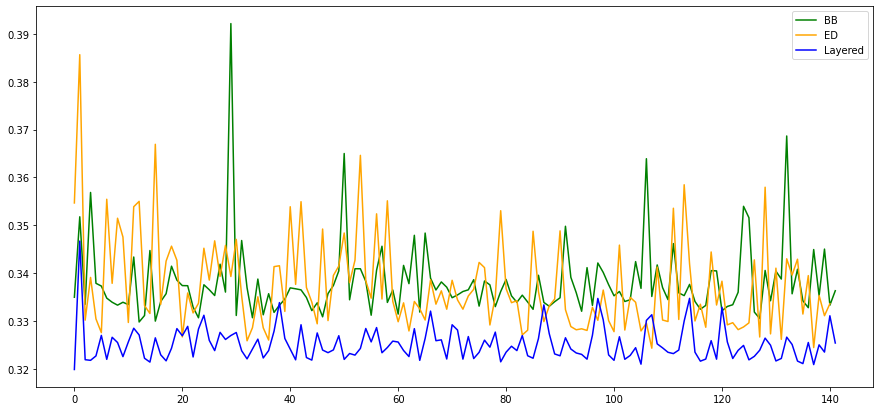

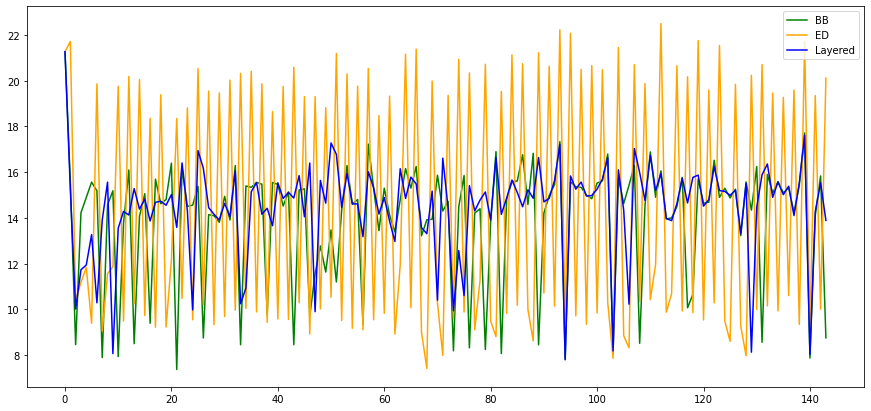

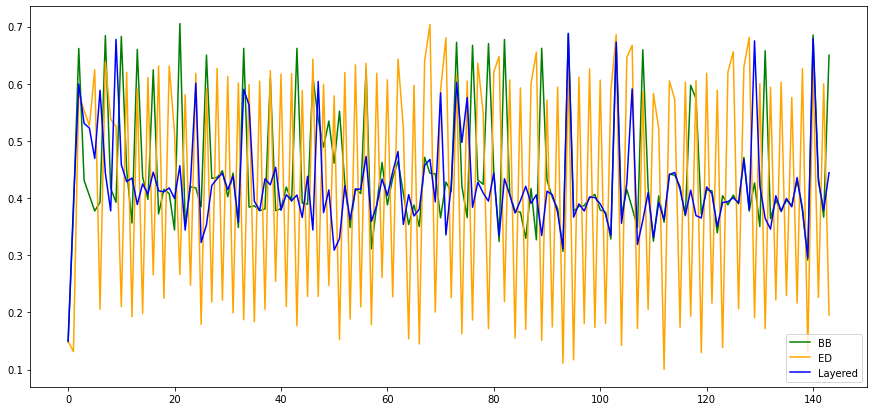

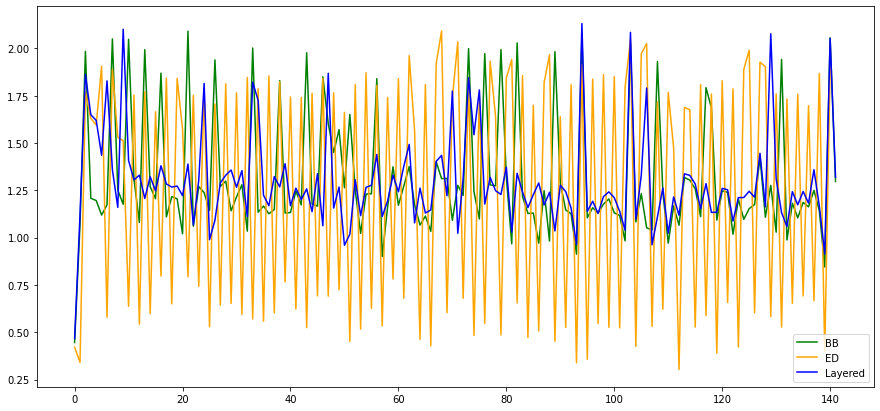

[0.6801326900720598, 0.6533011585474015, 0.6780853788057963, 0.6782146364450455] [0.3198673099279402, 0.34669884145259855, 0.32191462119420367, 0.32178536355495446] [0.14923855986489798, 0.3887136319017736, 0.5993694719350606, 0.5307086719262588] [0.46656396 1.12118526 1.86188956 1.64926293]


In [19]:
#plt.plot(ROI_BB, label="BB", color = "green")
#plt.plot(ROI_ED, label="ED", color = "orange")
#plt.plot(ROI_LY, label="Layered", color = "blue")
#plt.legend()
#plt.show()

ut = UtilityAnalyzer()
#CROI_LY = ut.cumulate_data(ROI_LY)
#CROI_BB = ut.cumulate_data(ROI_BB)
#CROI_ED = ut.cumulate_data(ROI_ED)
RT_LY = ut.reverse(R_LY)
RT_BB = ut.reverse(R_BB)
RT_ED = ut.reverse(R_ED)

plt.plot(RT_BB, label="BB", color = "green")
plt.plot(RT_ED, label="ED", color = "orange")
plt.plot(RT_LY, label="Layered", color = "blue")
plt.legend()
plt.show()

plt.plot(loader24h.data["CONSUMPTION_BB"], label="BB", color = "green")
plt.plot(loader24h.data["CONSUMPTION_ED"], label="ED", color = "orange")
plt.plot(loader24h.data["CONSUMPTION_LY"], label="Layered", color = "blue")
plt.legend()
plt.show()

plt.plot(__consumption[1], label="BB", color = "green")
plt.plot(__consumption[2], label="ED", color = "orange")
plt.plot(__consumption[0], label="Layered", color = "blue")
plt.legend()
plt.show()

ROI_LY = np.divide(__consumption[0][:min(len(RT_LY), len(__consumption[0]))], RT_LY[:min(len(RT_LY), len(__consumption[0]))])
ROI_BB = np.divide(__consumption[1][:min(len(RT_BB), len(__consumption[1]))], RT_BB[:min(len(RT_BB), len(__consumption[1]))])
ROI_ED = np.divide(__consumption[2][:min(len(RT_ED), len(__consumption[2]))], RT_ED[:min(len(RT_ED), len(__consumption[2]))])

plt.plot(ROI_BB, label="BB", color = "green")
plt.plot(ROI_ED, label="ED", color = "orange")
plt.plot(ROI_LY, label="Layered", color = "blue")
plt.legend()
plt.show()

print(R_LY[:4], RT_LY[:4], __consumption[0][:4], ROI_LY[:4])